In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# 한글 폰트 설정 (위에서 설명한 방법 사용)
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux (NanumGothic 설치 필요할 수 있음)
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# Climate Data

In [2]:
# Load the uploaded files
climate_files = {
    "NSW": 'C:/Users/USER/Documents/01_Academic/06_기후빅데이터분석/기후PBL/Australia_NSW_Moree_Aero.csv',
    "SA": 'C:/Users/USER/Documents/01_Academic/06_기후빅데이터분석/기후PBL/Australia_SA_Cleve_SA.csv',
    "VIC": 'C:/Users/USER/Documents/01_Academic/06_기후빅데이터분석/기후PBL/Australia_VIC_Mallee_Snowtown.csv',
    "WA": 'C:/Users/USER/Documents/01_Academic/06_기후빅데이터분석/기후PBL/Australia_WA_Geraldton_Airport.csv'
}

climate_dict = {}
for state, file_path in climate_files.items():
    print(state)
    df = pd.read_csv(file_path)
    climate_dict[state] = df
    display(df.head())
    display(df.info())
    print("-"*100)

NSW


지점명 시각 (YYYY-MM-DD)  월평균 일 최고기온 (°C)  월평균 일 최저기온 (°C)  \
0  NSW_Moree_Aero      2011-01-01             34.5             20.4   
1  NSW_Moree_Aero      2011-02-01             34.4             21.5   
2  NSW_Moree_Aero      2011-03-01             30.2             18.0   
3  NSW_Moree_Aero      2011-04-01             26.8             12.3   
4  NSW_Moree_Aero      2011-05-01             21.1              6.8   

   월별 일 최고기온(°C)  월별 일 최저기온(°C)  월 총 강수량 (mm)  월평균 일 태양복사량 (MJ/m^2)  
0           41.4           15.6          27.6                  26.0  
1           38.9           15.0          89.0                  24.3  
2           38.6            9.6          35.2                  18.2  
3           30.8            7.4          62.8                  17.4  
4           26.7           -0.8          22.4                  12.7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   지점명                   168 non-null    object 
 1   시각 (YYYY-MM-DD)       168 non-null    object 
 2   월평균 일 최고기온 (°C)       168 non-null    float64
 3   월평균 일 최저기온 (°C)       168 non-null    float64
 4   월별 일 최고기온(°C)         168 non-null    float64
 5   월별 일 최저기온(°C)         168 non-null    float64
 6   월 총 강수량 (mm)          168 non-null    float64
 7   월평균 일 태양복사량 (MJ/m^2)  168 non-null    float64
dtypes: float64(6), object(2)
memory usage: 10.6+ KB


None

----------------------------------------------------------------------------------------------------
SA


지점명 시각 (YYYY-MM-DD)  월평균 일 최고기온 (°C)  월평균 일 최저기온 (°C)  \
0  SA_Cleve_SA      2011-01-01             28.6             17.2   
1  SA_Cleve_SA      2011-02-01             27.0             17.2   
2  SA_Cleve_SA      2011-03-01             22.7             14.8   
3  SA_Cleve_SA      2011-04-01             22.8             12.8   
4  SA_Cleve_SA      2011-05-01             17.8             10.2   

   월별 일 최고기온(°C)  월별 일 최저기온(°C)  월 총 강수량 (mm)  월평균 일 태양복사량 (MJ/m^2)  
0           44.5           12.5           6.2                  27.1  
1           38.2           13.5          65.0                  20.4  
2           34.0           12.0          72.6                  15.8  
3           30.9            7.4          11.6                  15.2  
4           25.2            6.5          54.4                   9.5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   지점명                   168 non-null    object 
 1   시각 (YYYY-MM-DD)       168 non-null    object 
 2   월평균 일 최고기온 (°C)       168 non-null    float64
 3   월평균 일 최저기온 (°C)       168 non-null    float64
 4   월별 일 최고기온(°C)         168 non-null    float64
 5   월별 일 최저기온(°C)         168 non-null    float64
 6   월 총 강수량 (mm)          168 non-null    float64
 7   월평균 일 태양복사량 (MJ/m^2)  168 non-null    float64
dtypes: float64(6), object(2)
memory usage: 10.6+ KB


None

----------------------------------------------------------------------------------------------------
VIC


지점명 시각 (YYYY-MM-DD)  월평균 일 최고기온 (°C)  월평균 일 최저기온 (°C)  \
0  VIC_Snowtown      2011-01-01             32.7             14.9   
1  VIC_Snowtown      2011-02-01             31.0             15.4   
2  VIC_Snowtown      2011-03-01             26.4             12.6   
3  VIC_Snowtown      2011-04-01             24.4              9.2   
4  VIC_Snowtown      2011-05-01             18.6              7.3   

   월별 일 최고기온 (°C)  월별 일 최저기온(°C)  월 총 강수량 (mm)  월평균 일 태양복사량 (MJ/m^2)  
0            43.4            7.8           9.4                  27.9  
1            39.6            9.0          80.0                  22.0  
2            36.7            5.5          48.8                  17.4  
3            32.3            4.4           8.6                  15.6  
4            25.6           -0.3          31.0                  10.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   지점명                   168 non-null    object 
 1   시각 (YYYY-MM-DD)       168 non-null    object 
 2   월평균 일 최고기온 (°C)       168 non-null    float64
 3   월평균 일 최저기온 (°C)       168 non-null    float64
 4   월별 일 최고기온 (°C)        168 non-null    float64
 5   월별 일 최저기온(°C)         168 non-null    float64
 6   월 총 강수량 (mm)          168 non-null    float64
 7   월평균 일 태양복사량 (MJ/m^2)  168 non-null    float64
dtypes: float64(6), object(2)
memory usage: 10.6+ KB


None

----------------------------------------------------------------------------------------------------
WA


지점명 시각 (YYYY-MM-DD)  월평균 일최고기온 (°C)  월평균 일최저기온 (°C)  \
0  Geraldton Airport      2011-01-01           -99.9           -99.9   
1  Geraldton Airport      2011-02-01           -99.9           -99.9   
2  Geraldton Airport      2011-03-01           -99.9           -99.9   
3  Geraldton Airport      2011-04-01           -99.9           -99.9   
4  Geraldton Airport      2011-05-01           -99.9           -99.9   

   월별 일 최고기온(°C)  월별 일 최저기온(°C)  월 총 강수량 (mm)  월평균 일 태양복사량 (MJ/m^2)  
0          -99.9          -99.9         -99.9                  25.4  
1          -99.9          -99.9         -99.9                  24.2  
2          -99.9          -99.9         -99.9                  23.4  
3          -99.9          -99.9         -99.9                  17.3  
4          -99.9          -99.9         -99.9                  13.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   지점명                   168 non-null    object 
 1   시각 (YYYY-MM-DD)       168 non-null    object 
 2   월평균 일최고기온 (°C)        168 non-null    float64
 3   월평균 일최저기온 (°C)        168 non-null    float64
 4   월별 일 최고기온(°C)         168 non-null    float64
 5   월별 일 최저기온(°C)         168 non-null    float64
 6   월 총 강수량 (mm)          168 non-null    float64
 7   월평균 일 태양복사량 (MJ/m^2)  168 non-null    float64
dtypes: float64(6), object(2)
memory usage: 10.6+ KB


None

----------------------------------------------------------------------------------------------------


In [3]:
for state, df in climate_dict.items():    
    # 날짜 처리
    df['date'] = pd.to_datetime(df['시각 (YYYY-MM-DD)'])  # 날짜 변환
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    df.drop(columns=['시각 (YYYY-MM-DD)'], inplace=True)

    
    # 데이터 통계 요약
    print(f"Summary statistics for {state}:")
    display(df.describe())
    print("-"*100)

Summary statistics for NSW:


월평균 일 최고기온 (°C)  월평균 일 최저기온 (°C)  월별 일 최고기온(°C)  월별 일 최저기온(°C)  \
count       168.000000       168.000000     168.000000     168.000000   
mean         25.847024        11.626190      31.656548       5.203571   
min         -99.900000       -99.900000     -99.900000     -99.900000   
25%          21.425000         6.975000      27.250000       0.950000   
50%          27.800000        13.000000      33.350000       5.900000   
75%          32.900000        18.700000      38.925000      11.700000   
max          38.300000        24.300000      47.300000      20.100000   
std          15.094540        13.633954      15.944457      13.049679   

       월 총 강수량 (mm)  월평균 일 태양복사량 (MJ/m^2)                           date  \
count    168.000000            168.000000                            168   
mean      45.174405             18.644048  2017-12-15 22:51:25.714285824   
min      -99.900000            -99.900000            2011-01-01 00:00:00   
25%       12.450000             14.250000            2014-06-23 12:00:00   
50%       31.000000             19.700000            2017-12-16 12:00:00   
75%       62.900000             24.225000            2021-06-08 12:00:00   
max      263.400000             29.500000            2024-12-01 00:00:00   
std       47.747609             10.694857                            NaN   

             year       month  
count   168.00000  168.000000  
mean   2017.50000    6.500000  
min    2011.00000    1.000000  
25%    2014.00000    3.750000  
50%    2017.50000    6.500000  
75%    2021.00000    9.250000  
max    2024.00000   12.000000  
std       4.04318    3.462373

----------------------------------------------------------------------------------------------------
Summary statistics for SA:


월평균 일 최고기온 (°C)  월평균 일 최저기온 (°C)  월별 일 최고기온(°C)  월별 일 최저기온(°C)  \
count       168.000000       168.000000     168.000000     168.000000   
mean         21.069643        10.652381      30.752381       5.722619   
min         -99.900000       -99.900000     -99.900000     -99.900000   
25%          17.875000         8.925000      25.000000       4.175000   
50%          22.900000        11.750000      33.700000       6.500000   
75%          26.425000        14.900000      38.200000       9.525000   
max          31.500000        18.000000      46.000000      13.800000   
std          14.092393        12.643182      16.254359      12.093977   

       월 총 강수량 (mm)  월평균 일 태양복사량 (MJ/m^2)                           date  \
count    168.000000            168.000000                            168   
mean      32.947024             16.580357  2017-12-15 22:51:25.714285824   
min      -99.900000            -99.900000            2011-01-01 00:00:00   
25%       13.900000             11.300000            2014-06-23 12:00:00   
50%       26.800000             17.150000            2017-12-16 12:00:00   
75%       46.800000             22.625000            2021-06-08 12:00:00   
max      123.400000             28.800000            2024-12-01 00:00:00   
std       27.817633             10.835002                            NaN   

             year       month  
count   168.00000  168.000000  
mean   2017.50000    6.500000  
min    2011.00000    1.000000  
25%    2014.00000    3.750000  
50%    2017.50000    6.500000  
75%    2021.00000    9.250000  
max    2024.00000   12.000000  
std       4.04318    3.462373

----------------------------------------------------------------------------------------------------
Summary statistics for VIC:


월평균 일 최고기온 (°C)  월평균 일 최저기온 (°C)  월별 일 최고기온 (°C)  월별 일 최저기온(°C)  \
count       168.000000       168.000000      168.000000     168.000000   
mean         22.756548         7.666071       31.202976       1.367857   
min         -99.900000       -99.900000      -99.900000     -99.900000   
25%          17.600000         5.375000       24.575000      -0.700000   
50%          24.450000         8.500000       33.700000       2.250000   
75%          29.900000        12.100000       40.050000       5.825000   
max          35.300000        16.300000       47.300000      10.100000   
std          14.835064        12.442725       16.623727      11.718450   

       월 총 강수량 (mm)  월평균 일 태양복사량 (MJ/m^2)                           date  \
count    168.000000            168.000000                            168   
mean      25.392857             16.988095  2017-12-15 22:51:25.714285824   
min      -99.900000            -99.900000            2011-01-01 00:00:00   
25%        8.350000             11.725000            2014-06-23 12:00:00   
50%       22.700000             17.550000            2017-12-16 12:00:00   
75%       42.850000             23.325000            2021-06-08 12:00:00   
max      125.400000             29.700000            2024-12-01 00:00:00   
std       30.701486             10.969658                            NaN   

             year       month  
count   168.00000  168.000000  
mean   2017.50000    6.500000  
min    2011.00000    1.000000  
25%    2014.00000    3.750000  
50%    2017.50000    6.500000  
75%    2021.00000    9.250000  
max    2024.00000   12.000000  
std       4.04318    3.462373

----------------------------------------------------------------------------------------------------
Summary statistics for WA:


월평균 일최고기온 (°C)  월평균 일최저기온 (°C)  월별 일 최고기온(°C)  월별 일 최저기온(°C)  \
count      168.000000      168.000000     168.000000     168.000000   
mean        20.949405        8.369643      28.928571       2.995833   
min        -99.900000      -99.900000     -99.900000     -99.900000   
25%         22.050000        9.775000      28.375000       4.275000   
50%         26.500000       12.600000      35.600000       7.300000   
75%         31.200000       17.200000      40.925000      11.225000   
max         37.300000       22.000000      49.300000      15.700000   
std         27.492431       24.600615      29.655293      23.388373   

       월 총 강수량 (mm)  월평균 일 태양복사량 (MJ/m^2)                           date  \
count    168.000000            168.000000                            168   
mean      24.050595             19.352381  2017-12-15 22:51:25.714285824   
min      -99.900000            -99.900000            2011-01-01 00:00:00   
25%        1.550000             14.050000            2014-06-23 12:00:00   
50%       14.200000             19.850000            2017-12-16 12:00:00   
75%       46.700000             25.825000            2021-06-08 12:00:00   
max      157.000000             29.800000            2024-12-01 00:00:00   
std       45.690978             11.010653                            NaN   

             year       month  
count   168.00000  168.000000  
mean   2017.50000    6.500000  
min    2011.00000    1.000000  
25%    2014.00000    3.750000  
50%    2017.50000    6.500000  
75%    2021.00000    9.250000  
max    2024.00000   12.000000  
std       4.04318    3.462373

----------------------------------------------------------------------------------------------------


In [4]:
missing_lst = []
for state, df in climate_dict.items():

    # describe로 확인한 결과 결측치를 -99.9로 표현한 듯
    df.replace(-99.9, np.nan, inplace=True)
    # 결측치 확인
    print(f"{state}의 결측치 :\n{df.isnull().sum()}\n")

    # 결측치가 있는 행의 날짜 확인
    missing_rows = df[df.isnull().any(axis=1)]
    missing_dates = missing_rows['date'].unique()
    print("결측치가 있는 행의 날짜:")
    print(missing_dates)
     
    # 결측치가 있는 행의 날짜 추출
    missing_dates = df[df.isnull().any(axis=1)]
    missing_lst.append(set(missing_dates['date']))

    print("-" * 100)

NSW의 결측치 :
지점명                     0
월평균 일 최고기온 (°C)         2
월평균 일 최저기온 (°C)         2
월별 일 최고기온(°C)           2
월별 일 최저기온(°C)           2
월 총 강수량 (mm)            1
월평균 일 태양복사량 (MJ/m^2)    1
date                    0
year                    0
month                   0
dtype: int64

결측치가 있는 행의 날짜:
<DatetimeArray>
['2024-11-01 00:00:00', '2024-12-01 00:00:00']
Length: 2, dtype: datetime64[ns]
----------------------------------------------------------------------------------------------------
SA의 결측치 :
지점명                     0
월평균 일 최고기온 (°C)         2
월평균 일 최저기온 (°C)         2
월별 일 최고기온(°C)           2
월별 일 최저기온(°C)           2
월 총 강수량 (mm)            1
월평균 일 태양복사량 (MJ/m^2)    1
date                    0
year                    0
month                   0
dtype: int64

결측치가 있는 행의 날짜:
<DatetimeArray>
['2024-11-01 00:00:00', '2024-12-01 00:00:00']
Length: 2, dtype: datetime64[ns]
----------------------------------------------------------------------------------------------------
VIC의 결측

In [5]:
# 2. 모든 State에서 공통적으로 결측치가 발생한 날짜
common_missing_dates = set.intersection(*missing_lst)
print("모든 주에서 공통적으로 결측치가 발생한 날짜:")
print(common_missing_dates)

# 3. 모든 State의 결측치 날짜 중 중복 제거된 값
all_missing_dates = set.union(*missing_lst)
print("\n모든 주의 결측치 날짜 (중복 제거):")
print(all_missing_dates)

모든 주에서 공통적으로 결측치가 발생한 날짜:
{Timestamp('2024-12-01 00:00:00'), Timestamp('2024-11-01 00:00:00')}

모든 주의 결측치 날짜 (중복 제거):
{Timestamp('2015-10-01 00:00:00'), Timestamp('2011-05-01 00:00:00'), Timestamp('2011-07-01 00:00:00'), Timestamp('2011-06-01 00:00:00'), Timestamp('2024-12-01 00:00:00'), Timestamp('2011-02-01 00:00:00'), Timestamp('2011-04-01 00:00:00'), Timestamp('2024-11-01 00:00:00'), Timestamp('2011-01-01 00:00:00'), Timestamp('2011-03-01 00:00:00'), Timestamp('2023-09-01 00:00:00')}


- 모든 주 </br>
[2024-11-01, 2024-12-01] ⇒ 아직 데이터 수집 시기 아님

- VIC </br>
['2015-10-01 00:00:00', '2023-09-01 00:00:00'] ⇒ 수집 안 됨

- WA </br>
['2011-01-01 00:00:00', '2011-02-01 00:00:00', '2011-03-01 00:00:00',</br>
 '2011-04-01 00:00:00', '2011-05-01 00:00:00', '2011-06-01 00:00:00',</br>
 '2011-07-01 00:00:00', '2024-11-01 00:00:00', '2024-12-01 00:00:00']</br>
 ⇒ **2011-01-01 ~2011-07-01** 동안 데이터 수집 안 됨

## **[2011-01-08 ~ 2024-10-01]  데이터로 분석**

In [6]:
for state, df in climate_dict.items():
    print(state)
    print(df.isnull().sum())  # 필터링 전 결측치 확인

    # 결측치 처리 - 필터링 
    df = df[(df['date'] >= pd.Timestamp('2011-01-08')) & 
            (df['date'] <= pd.Timestamp('2024-10-01'))]
    
    # 위 날짜 내 결측 날짜 식별
    missing_dates = df[df.isnull().any(axis=1)]["date"].unique()
    if len(missing_dates) > 0:
        print(f"{state} 결측 날짜: {missing_dates}")

    # Step 3: 결측치 처리 - 선형 보간법
    df.interpolate(method='linear', limit_direction='both', inplace=True)

    # Step 4: 결측치가 제대로 처리되었는지 확인
    if df.isnull().sum().sum() > 0:
        print(f"{state}에 여전히 결측치가 남아 있습니다.")
    else:
        print(f"{state}의 결측치가 모두 처리되었습니다.")

    # Step 5: 갱신된 데이터프레임을 climate_dict에 저장
    climate_dict[state] = df


    # 동적 변수 생성 (예: nsw_df, sa_df 등)
    globals()[f"{state.lower()}_df"] = df  # 변수명: state의 소문자 + '_df'
    print()

NSW
지점명                     0
월평균 일 최고기온 (°C)         2
월평균 일 최저기온 (°C)         2
월별 일 최고기온(°C)           2
월별 일 최저기온(°C)           2
월 총 강수량 (mm)            1
월평균 일 태양복사량 (MJ/m^2)    1
date                    0
year                    0
month                   0
dtype: int64
NSW의 결측치가 모두 처리되었습니다.

SA
지점명                     0
월평균 일 최고기온 (°C)         2
월평균 일 최저기온 (°C)         2
월별 일 최고기온(°C)           2
월별 일 최저기온(°C)           2
월 총 강수량 (mm)            1
월평균 일 태양복사량 (MJ/m^2)    1
date                    0
year                    0
month                   0
dtype: int64
SA의 결측치가 모두 처리되었습니다.

VIC
지점명                     0
월평균 일 최고기온 (°C)         2
월평균 일 최저기온 (°C)         2
월별 일 최고기온 (°C)          2
월별 일 최저기온(°C)           2
월 총 강수량 (mm)            4
월평균 일 태양복사량 (MJ/m^2)    1
date                    0
year                    0
month                   0
dtype: int64
VIC 결측 날짜: <DatetimeArray>
['2015-10-01 00:00:00', '2023-09-01 00:00:00']
Length: 2, dtype: datetime64[ns]
VIC의 결측치가 모두 처리되었습

C:\Users\USER\AppData\Local\Temp\ipykernel_18028\269917538.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', limit_direction='both', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_18028\269917538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', limit_direction='both', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_18028\269917538.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', limit_direction='both', inplace=True)
C:\Users\USER\A

In [7]:
for state, df in climate_dict.items():
    print(f'{state}-----\n{df.isnull().sum()}')

NSW-----
지점명                     0
월평균 일 최고기온 (°C)         0
월평균 일 최저기온 (°C)         0
월별 일 최고기온(°C)           0
월별 일 최저기온(°C)           0
월 총 강수량 (mm)            0
월평균 일 태양복사량 (MJ/m^2)    0
date                    0
year                    0
month                   0
dtype: int64
SA-----
지점명                     0
월평균 일 최고기온 (°C)         0
월평균 일 최저기온 (°C)         0
월별 일 최고기온(°C)           0
월별 일 최저기온(°C)           0
월 총 강수량 (mm)            0
월평균 일 태양복사량 (MJ/m^2)    0
date                    0
year                    0
month                   0
dtype: int64
VIC-----
지점명                     0
월평균 일 최고기온 (°C)         0
월평균 일 최저기온 (°C)         0
월별 일 최고기온 (°C)          0
월별 일 최저기온(°C)           0
월 총 강수량 (mm)            0
월평균 일 태양복사량 (MJ/m^2)    0
date                    0
year                    0
month                   0
dtype: int64
WA-----
지점명                     0
월평균 일최고기온 (°C)          0
월평균 일최저기온 (°C)          0
월별 일 최고기온(°C)           0
월별 일 최저기온(°C)           0
월 총 강수량 (mm)     

In [8]:
# 결과 확인
print("Updated climate_dict keys:")
print(climate_dict.keys())

# 예시 출력
print("\nExample DataFrame (NSW):")
display(nsw_df.head())

Updated climate_dict keys:
dict_keys(['NSW', 'SA', 'VIC', 'WA'])

Example DataFrame (NSW):


지점명  월평균 일 최고기온 (°C)  월평균 일 최저기온 (°C)  월별 일 최고기온(°C)  \
1  NSW_Moree_Aero             34.4             21.5           38.9   
2  NSW_Moree_Aero             30.2             18.0           38.6   
3  NSW_Moree_Aero             26.8             12.3           30.8   
4  NSW_Moree_Aero             21.1              6.8           26.7   
5  NSW_Moree_Aero             18.6              5.0           23.9   

   월별 일 최저기온(°C)  월 총 강수량 (mm)  월평균 일 태양복사량 (MJ/m^2)       date  year  month  
1           15.0          89.0                  24.3 2011-02-01  2011      2  
2            9.6          35.2                  18.2 2011-03-01  2011      3  
3            7.4          62.8                  17.4 2011-04-01  2011      4  
4           -0.8          22.4                  12.7 2011-05-01  2011      5  
5           -2.8          54.8                  11.2 2011-06-01  2011      6

In [9]:
# df 컬럼 이름 변경
def column_rename(df):
    # 컬럼 이름 변경
    df.rename(columns={
        '지점명': 'state',

        '월평균 일 최고기온 (°C)': 'avg_max_temp',
        '월평균 일 최저기온 (°C)': 'avg_min_temp',
        '월평균 일최고기온 (°C)' : 'avg_max_temp',
        '월평균 일최저기온 (°C)' : 'avg_min_temp',

        '월별 일 최고기온(°C)': 'max_temp',
        '월별 일 최저기온(°C)': 'min_temp',
        '월별 일 최고기온 (°C)' : 'max_temp',      
        '월별 일 최저기온(°C)'  : 'min_temp',

        '월 총 강수량 (mm)': 'total_rainfall',

        '월평균 일 태양복사량 (MJ/m^2)' : 'avg_solar_radiation'
           
    }, inplace=True)
    
    return df

# 주별 데이터를 처리 및 시각화
for state, df in climate_dict.items():
    print(f'--------- Analysis for {state} ---------')
    
    # 컬럼명 바꾸기
    df = column_rename(df)
    
    # 이상치 탐지 (IQR 방식)
    for col in ['avg_max_temp', 'avg_min_temp', 'max_temp', 'min_temp', 'total_rainfall']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers detected.")

--------- Analysis for NSW ---------
avg_max_temp: 0 outliers detected.
avg_min_temp: 0 outliers detected.
max_temp: 0 outliers detected.
min_temp: 0 outliers detected.
total_rainfall: 9 outliers detected.
--------- Analysis for SA ---------
avg_max_temp: 0 outliers detected.
avg_min_temp: 0 outliers detected.
max_temp: 0 outliers detected.
min_temp: 0 outliers detected.
total_rainfall: 6 outliers detected.
--------- Analysis for VIC ---------
avg_max_temp: 0 outliers detected.
avg_min_temp: 0 outliers detected.
max_temp: 0 outliers detected.
min_temp: 0 outliers detected.
total_rainfall: 2 outliers detected.
--------- Analysis for WA ---------
avg_max_temp: 0 outliers detected.
avg_min_temp: 0 outliers detected.
max_temp: 0 outliers detected.
min_temp: 0 outliers detected.
total_rainfall: 5 outliers detected.


In [10]:
for state, df in climate_dict.items():        
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 1 to 165
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   state                165 non-null    object        
 1   avg_max_temp         165 non-null    float64       
 2   avg_min_temp         165 non-null    float64       
 3   max_temp             165 non-null    float64       
 4   min_temp             165 non-null    float64       
 5   total_rainfall       165 non-null    float64       
 6   avg_solar_radiation  165 non-null    float64       
 7   date                 165 non-null    datetime64[ns]
 8   year                 165 non-null    int32         
 9   month                165 non-null    int32         
dtypes: datetime64[ns](1), float64(6), int32(2), object(1)
memory usage: 12.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 1 to 165
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   state                165 non-null    object        
 1   avg_max_temp         165 non-null    float64       
 2   avg_min_temp         165 non-null    float64       
 3   max_temp             165 non-null    float64       
 4   min_temp             165 non-null    float64       
 5   total_rainfall       165 non-null    float64       
 6   avg_solar_radiation  165 non-null    float64       
 7   date                 165 non-null    datetime64[ns]
 8   year                 165 non-null    int32         
 9   month                165 non-null    int32         
dtypes: datetime64[ns](1), float64(6), int32(2), object(1)
memory usage: 12.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 1 to 165
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   state                165 non-null    object        
 1   avg_max_temp         165 non-null    float64       
 2   avg_min_temp         165 non-null    float64       
 3   max_temp             165 non-null    float64       
 4   min_temp             165 non-null    float64       
 5   total_rainfall       165 non-null    float64       
 6   avg_solar_radiation  165 non-null    float64       
 7   date                 165 non-null    datetime64[ns]
 8   year                 165 non-null    int32         
 9   month                165 non-null    int32         
dtypes: datetime64[ns](1), float64(6), int32(2), object(1)
memory usage: 12.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 1 to 165
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   state                165 non-null    object        
 1   avg_max_temp         165 non-null    float64       
 2   avg_min_temp         165 non-null    float64       
 3   max_temp             165 non-null    float64       
 4   min_temp             165 non-null    float64       
 5   total_rainfall       165 non-null    float64       
 6   avg_solar_radiation  165 non-null    float64       
 7   date                 165 non-null    datetime64[ns]
 8   year                 165 non-null    int32         
 9   month                165 non-null    int32         
dtypes: datetime64[ns](1), float64(6), int32(2), object(1)
memory usage: 12.9+ KB


None

## **1. 개별 데이터셋의 피처별 분석**

In [11]:
# nsw_df, sa_df, vic_df, wa_df

# 분석할 피처 리스트
features_lst = ['avg_max_temp', 'avg_min_temp', 'max_temp', 'min_temp', 
                       'total_rainfall', 'avg_solar_radiation']

### 1) 모든 피처의 월별 평균

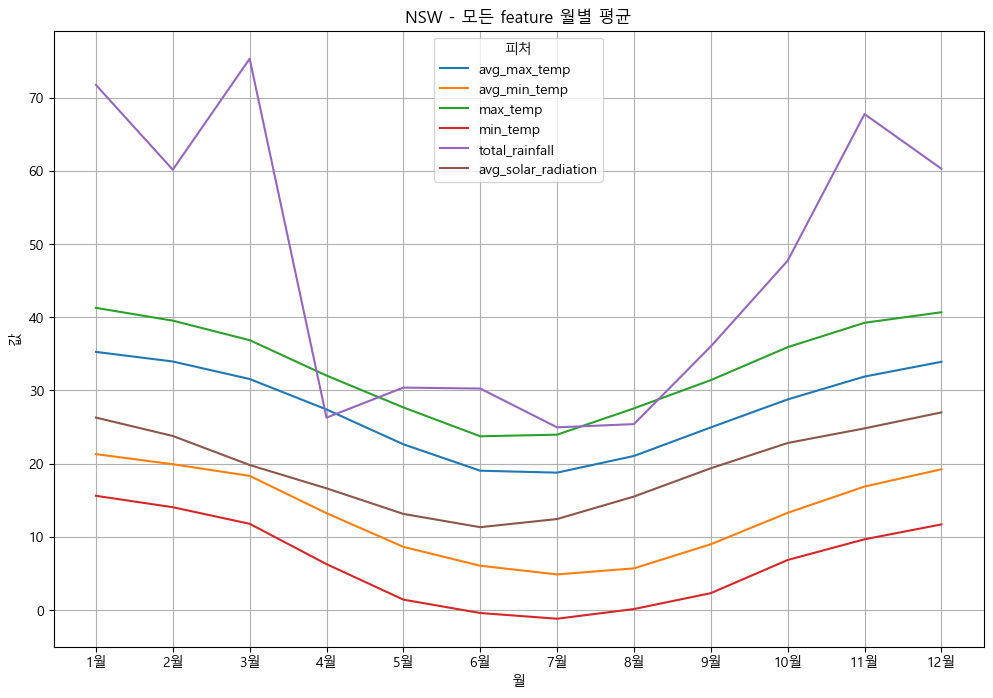

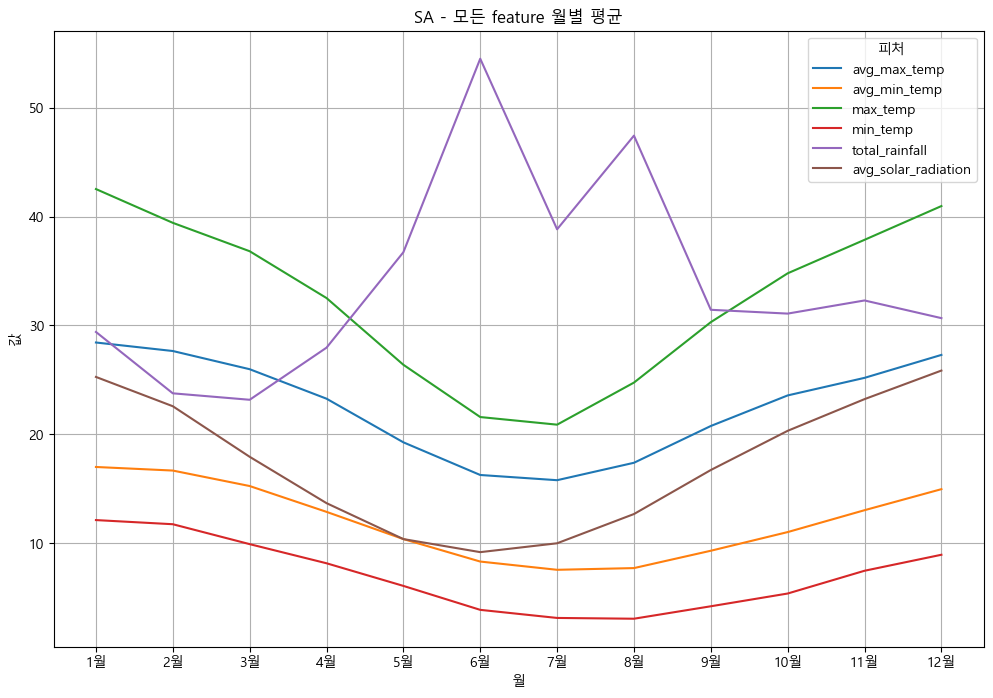

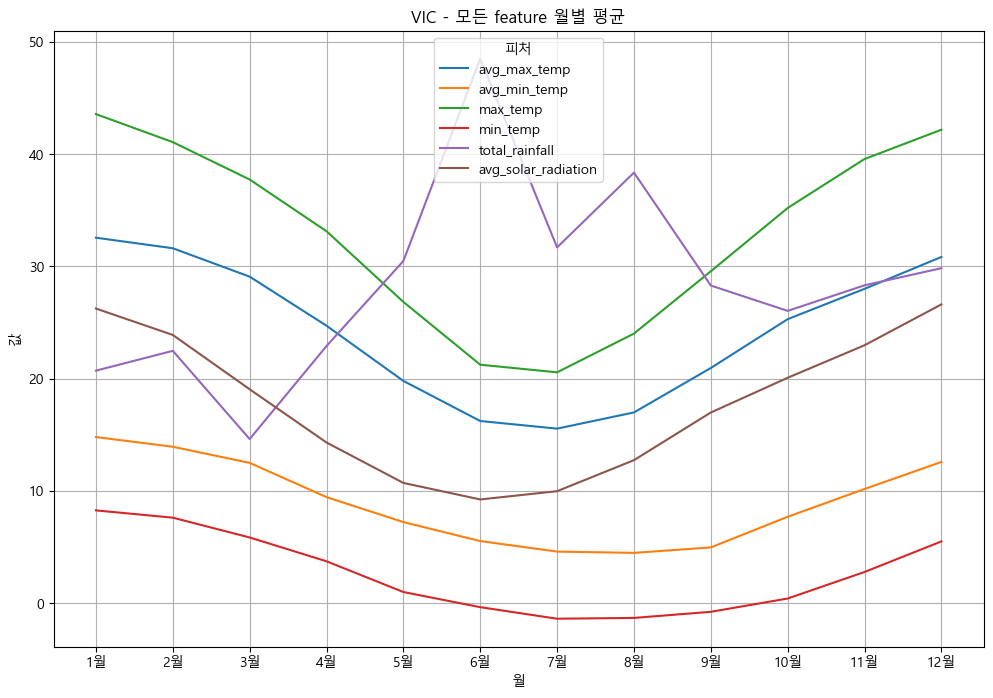

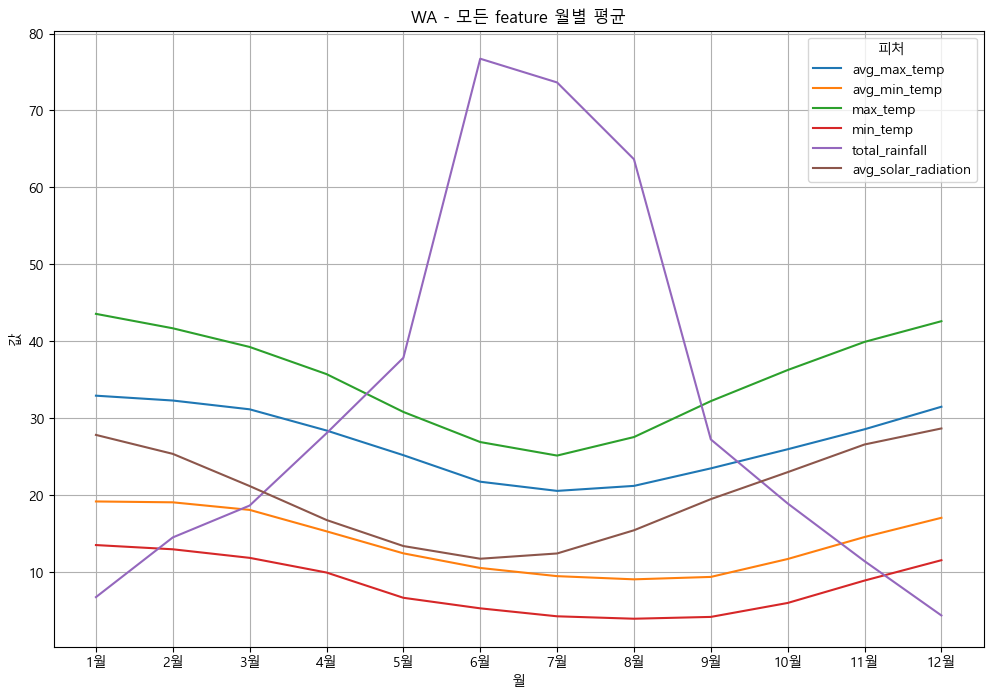

In [12]:
def analyze_monthly_grouped(features_lst):
    """
    하나의 그래프에 모든 피처를 시각화
    :param features_lst: 분석할 피처 리스트
    """
    for state, df in climate_dict.items():        
        # 시각화 시작
        plt.figure(figsize=(12, 8))
        
        for feature in features_lst:
            # 월별 평균 계산
            grouped_data = df.groupby("month")[feature].mean().reset_index()
            
            # 그래프에 추가
            sns.lineplot(data=grouped_data, x="month", y=feature, label=feature)
        
        # 그래프 설정
        plt.title(f"{state} - 모든 feature 월별 평균")
        plt.xlabel("월")
        plt.ylabel("값")
        plt.xticks(range(1, 13), [f"{m}월" for m in range(1, 13)])  # x축: 1~12월
        plt.legend(title="피처")
        plt.grid(True)
        plt.show()


analyze_monthly_grouped(features_lst)

해석
- avg_max_temp의 월별 평균: 각 월의 일별 최고 기온의 평균을 계산한 후, 이러한 월별 평균값을 다시 평균낸 것. 이는 각 월의 일반적인 최고 기온 수준을 파악하는 데 유용
- max_temp의 월별 평균: 각 월에서 가장 높은 기온만을 추출하여, 그 값들의 평균 낸 것. 이는 각 월의 최고 기온 경향을 파악하는 데 유용.

In [15]:
# 이후 코드들 진행하면서 결측치가 많이 생길 수 있으므로, 지금까지 데이터 새로운 변수에 저장
climate_dict_origin = climate_dict.copy()

### 2) max_temp의 전년 및 평년 대비 변화

<Figure size 1400x800 with 0 Axes>

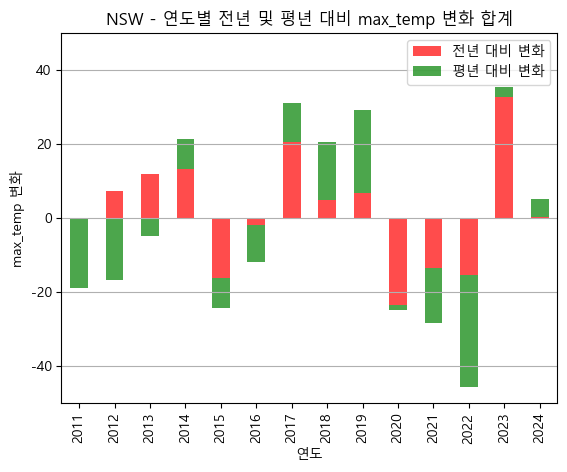

<Figure size 1400x800 with 0 Axes>

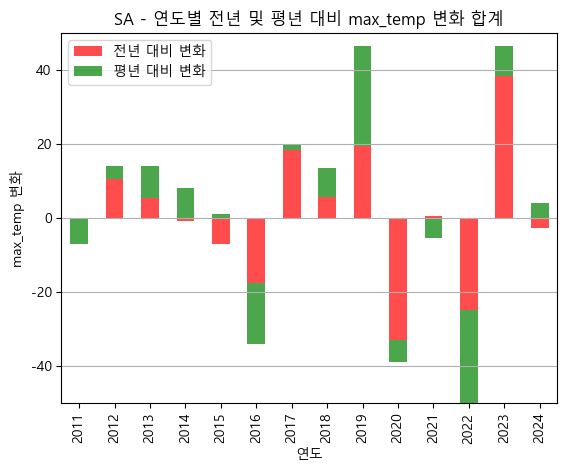

<Figure size 1400x800 with 0 Axes>

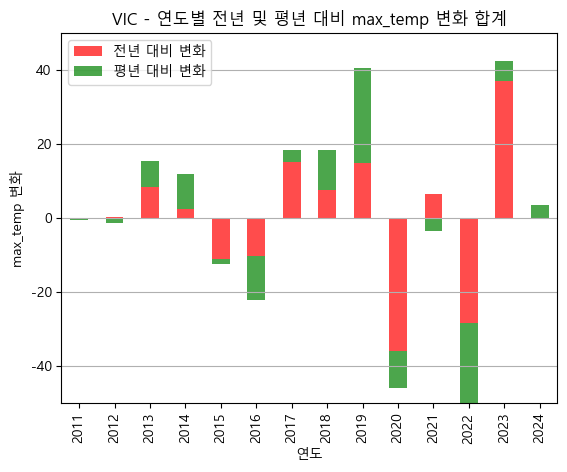

<Figure size 1400x800 with 0 Axes>

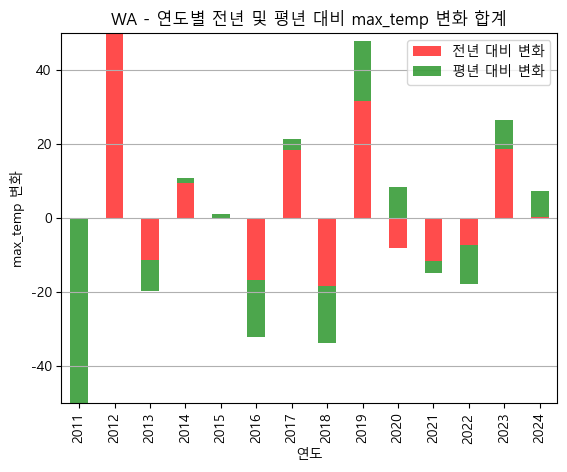

In [16]:
def analyze_feature_changes(feature, baseline_years=10, y_lim=(-50, 50)):
    """
    전년 및 평년 대비 특정 피처의 변화를 분석하고 시각화
    :param baseline_years: 평년 기준 연도 수 (기본: 10년)
    :param y_lim: y축 범위 설정 (기본: -50 ~ 50)
    """
    for state, df in climate_dict.items():
        
        # 평년 피처 계산
        baseline_data = df[df["year"] >= df["year"].max() - baseline_years]
        avg_feature_baseline = baseline_data.groupby("month")[feature].mean()
        
        # 전년 대비 및 평년 대비 변화 계산
        df["prev_year_feature"] = df[feature].shift(12)  # 전년도 데이터
        df["baseline_feature"] = df["month"].map(avg_feature_baseline)
        df["feature_change_prev"] = df[feature] - df["prev_year_feature"]
        df["feature_change_baseline"] = df[feature] - df["baseline_feature"]
        
        # 연도별 전년 대비/평년 대비 피처 변화 합계
        yearly_changes = df.groupby("year")[["feature_change_prev", "feature_change_baseline"]].sum()
        
        # 연도별 막대 그래프
        plt.figure(figsize=(14, 8))
        yearly_changes.plot(kind="bar", stacked=True, color=["red", "green"], alpha=0.7)
        plt.title(f"{state} - 연도별 전년 및 평년 대비 {feature} 변화 합계")
        plt.xlabel("연도")
        plt.ylabel(f"{feature} 변화")
        plt.ylim(y_lim)  # y축 고정
        plt.grid(axis="y")
        plt.legend(["전년 대비 변화", "평년 대비 변화"])
        plt.show()
analyze_feature_changes('max_temp')

### 3) avg_max_temp

<Figure size 1400x800 with 0 Axes>

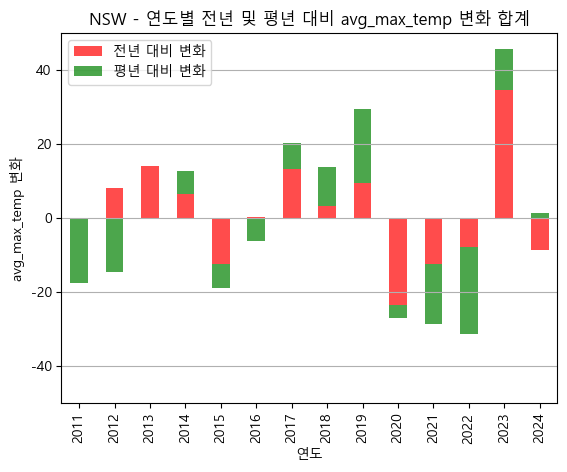

<Figure size 1400x800 with 0 Axes>

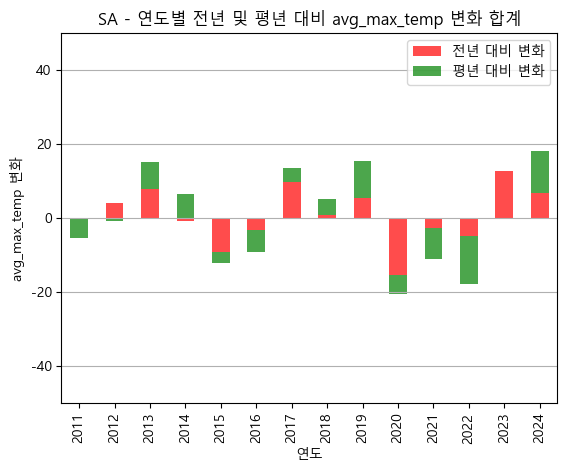

<Figure size 1400x800 with 0 Axes>

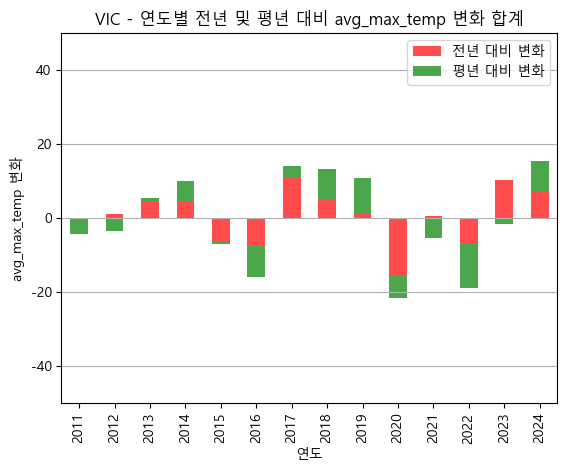

<Figure size 1400x800 with 0 Axes>

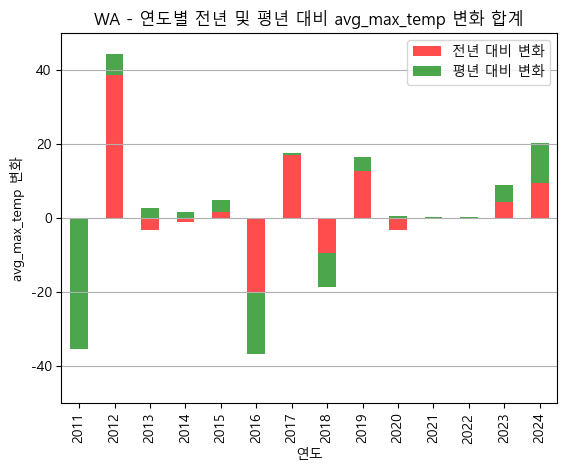

In [17]:
analyze_feature_changes('avg_max_temp')

### 4) min_temp

<Figure size 1400x800 with 0 Axes>

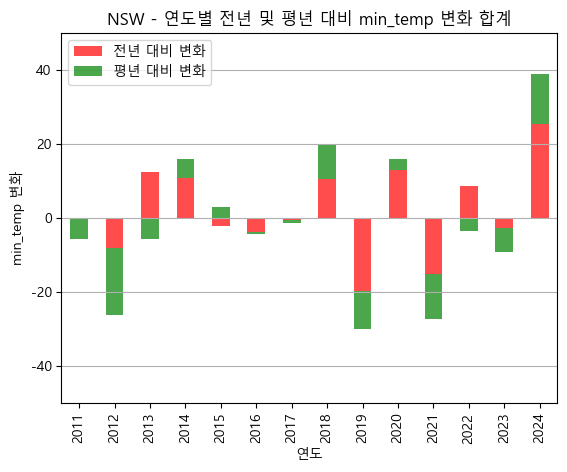

<Figure size 1400x800 with 0 Axes>

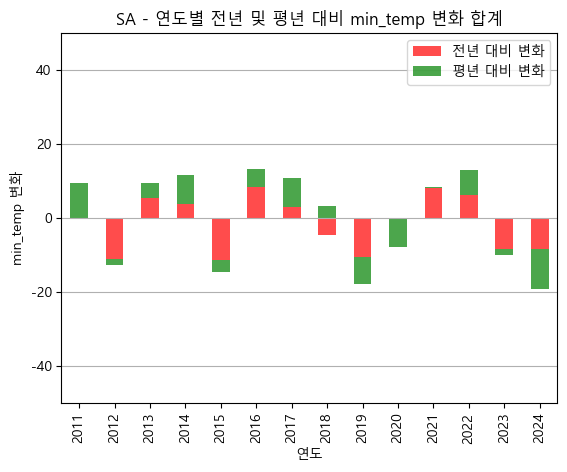

<Figure size 1400x800 with 0 Axes>

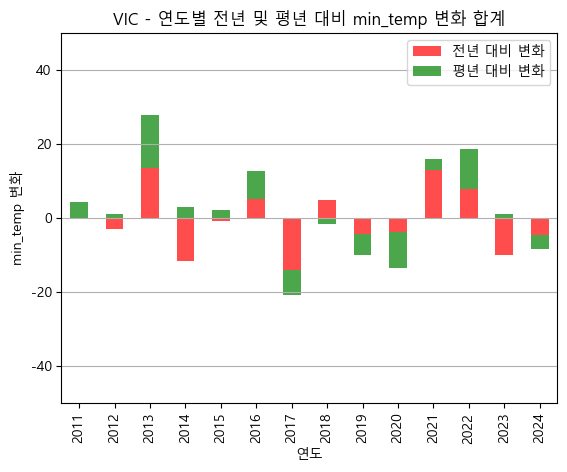

<Figure size 1400x800 with 0 Axes>

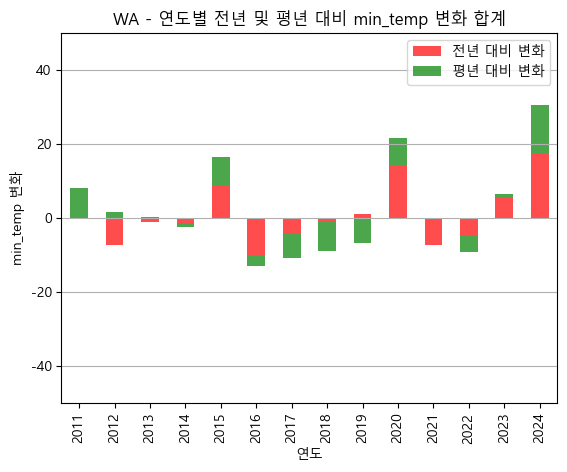

In [18]:
analyze_feature_changes('min_temp')

### 5) avg_max_temp

<Figure size 1400x800 with 0 Axes>

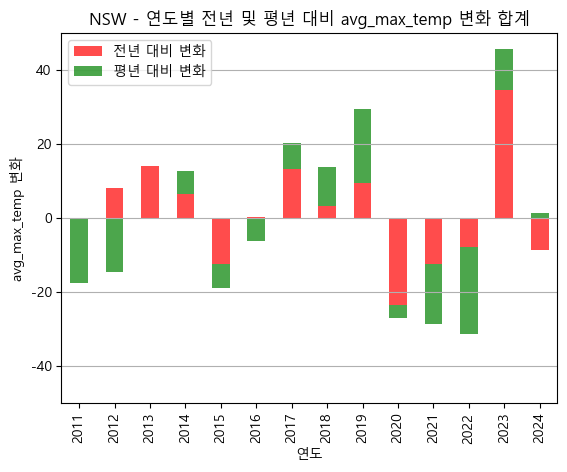

<Figure size 1400x800 with 0 Axes>

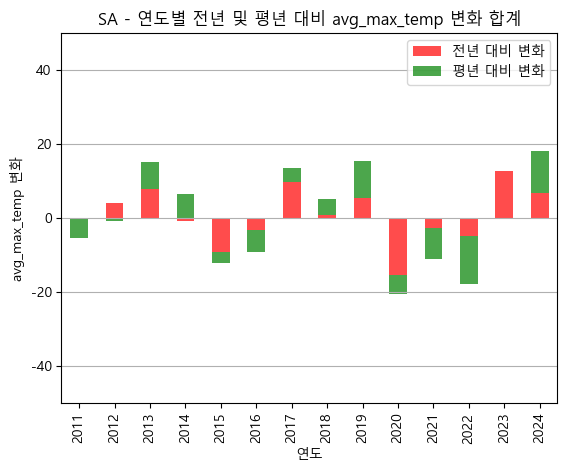

<Figure size 1400x800 with 0 Axes>

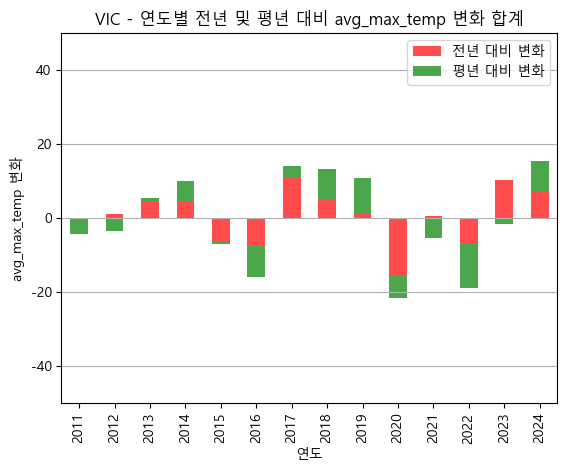

<Figure size 1400x800 with 0 Axes>

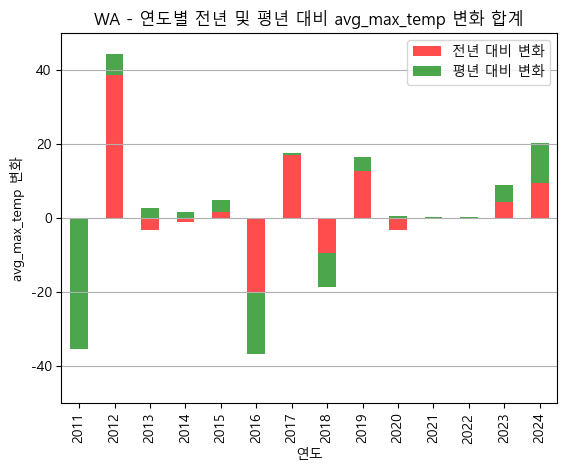

In [19]:
analyze_feature_changes('avg_max_temp')

<Figure size 1400x800 with 0 Axes>

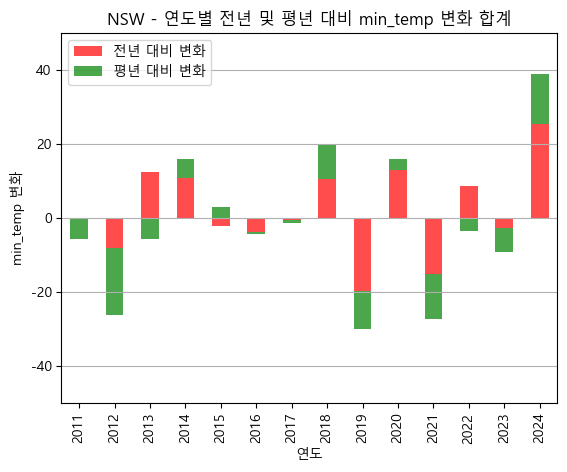

<Figure size 1400x800 with 0 Axes>

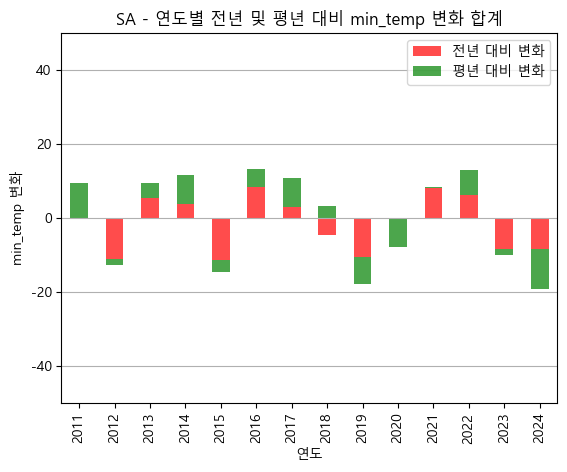

<Figure size 1400x800 with 0 Axes>

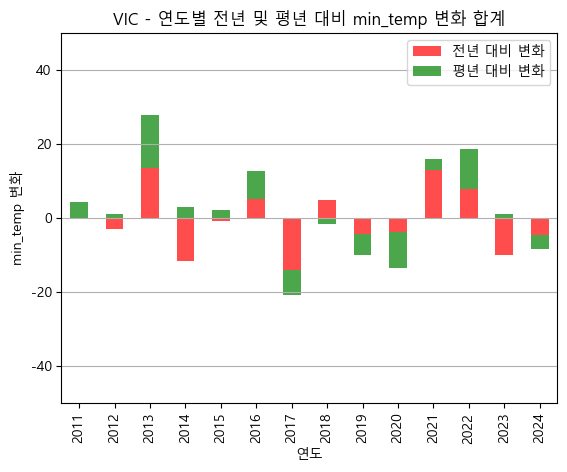

<Figure size 1400x800 with 0 Axes>

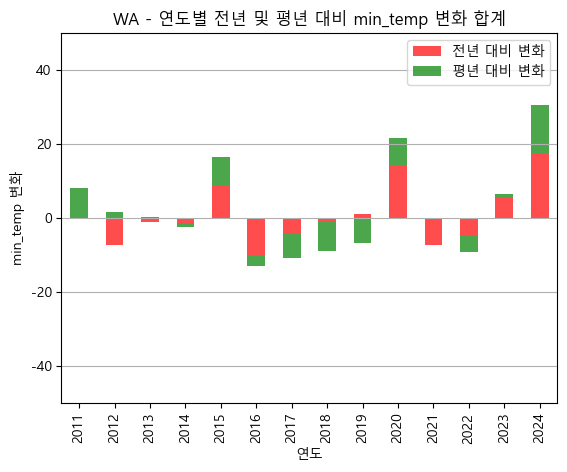

In [20]:
analyze_feature_changes('min_temp')

### 6) total_rainfall

<Figure size 1400x800 with 0 Axes>

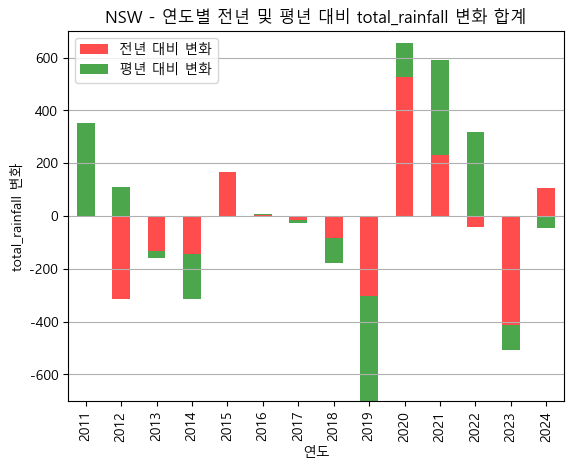

<Figure size 1400x800 with 0 Axes>

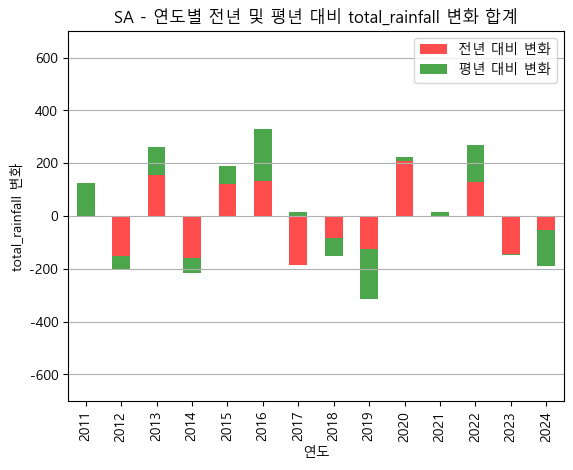

<Figure size 1400x800 with 0 Axes>

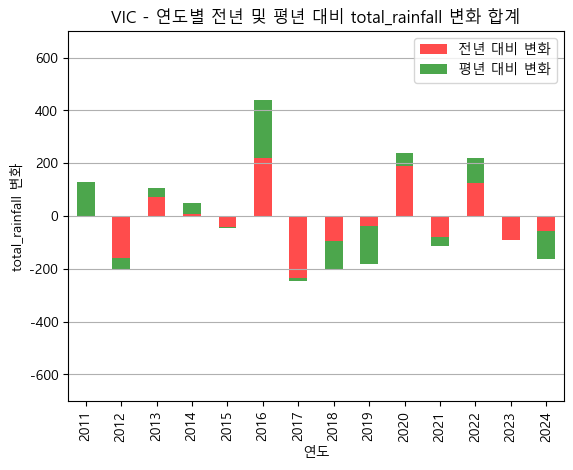

<Figure size 1400x800 with 0 Axes>

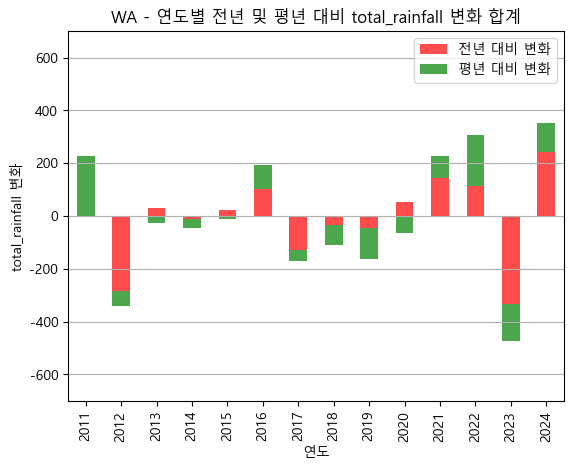

In [21]:
analyze_feature_changes('total_rainfall', y_lim=(-700,700))

**total_rainfall 해석**

  대체적으로 (SA)제외하고
  - **2011년~2015년**: 변동이 크지 않았음.
  - **2020년~2021년**: 전년도 대비 강수량 변화가 크게 나타남.

In [22]:
for state, df in climate_dict.items():
    print(f'{state}-----\n{df.isnull().sum()}')

NSW-----
state                       0
avg_max_temp                0
avg_min_temp                0
max_temp                    0
min_temp                    0
total_rainfall              0
avg_solar_radiation         0
date                        0
year                        0
month                       0
prev_year_feature          12
baseline_feature            0
feature_change_prev        12
feature_change_baseline     0
dtype: int64
SA-----
state                       0
avg_max_temp                0
avg_min_temp                0
max_temp                    0
min_temp                    0
total_rainfall              0
avg_solar_radiation         0
date                        0
year                        0
month                       0
prev_year_feature          12
baseline_feature            0
feature_change_prev        12
feature_change_baseline     0
dtype: int64
VIC-----
state                       0
avg_max_temp                0
avg_min_temp                0
max_temp          

## **2. 데이터 간 피처 비교**

In [ ]:
# climate_dict_origin 사용

### 1) 월 총 강수량(total_rainfall) 이상치

C:\Users\USER\AppData\Local\Temp\ipykernel_18028\1938781732.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state', y='total_rainfall', data=combined_data, palette="Set2")


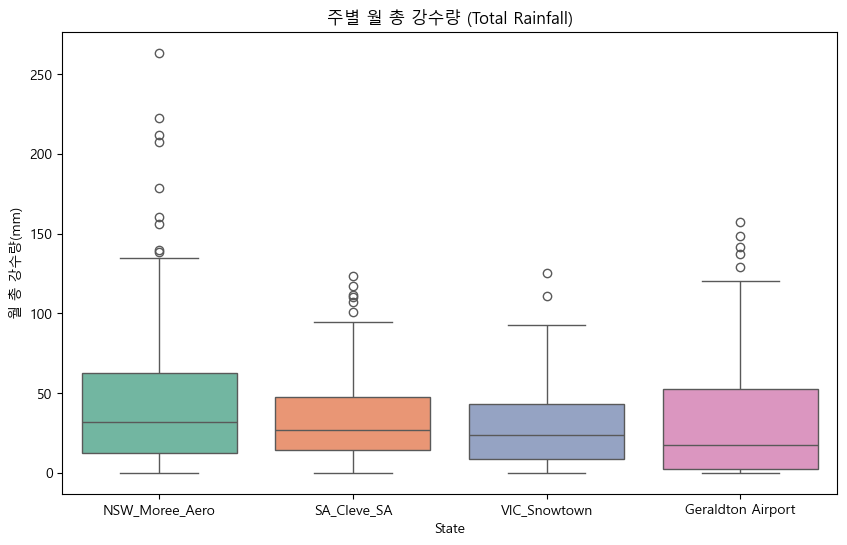

In [23]:
combined_data = pd.DataFrame()
for state, df in climate_dict_origin.items():
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Create a boxplot for total_rainfall by state
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='total_rainfall', data=combined_data, palette="Set2")
plt.title('주별 월 총 강수량 (Total Rainfall)')
plt.xlabel('State')
plt.ylabel('월 총 강수량(mm)')
plt.show()

- 이상치 시각화 해석

    - 중앙값 비교: </br>
    NSW와 VIC 지역은 다른 주에 비해 강수량이 상대적으로 높습니다.
    SA와 WA 지역은 중앙값이 낮아 더 건조한 기후를 나타냅니다.

    - 이상치 비교: </br>
    모든 주에서 이상치가 탐지됨. 특히 NSW 지역에서 250mm 이상의 극단적 강수량이 나타났습니다. 이러한 이상치는 폭우와 같은 극단적인 기후 이벤트를 나타낼 가능성이 큽니다.

### 2) 피처 분포

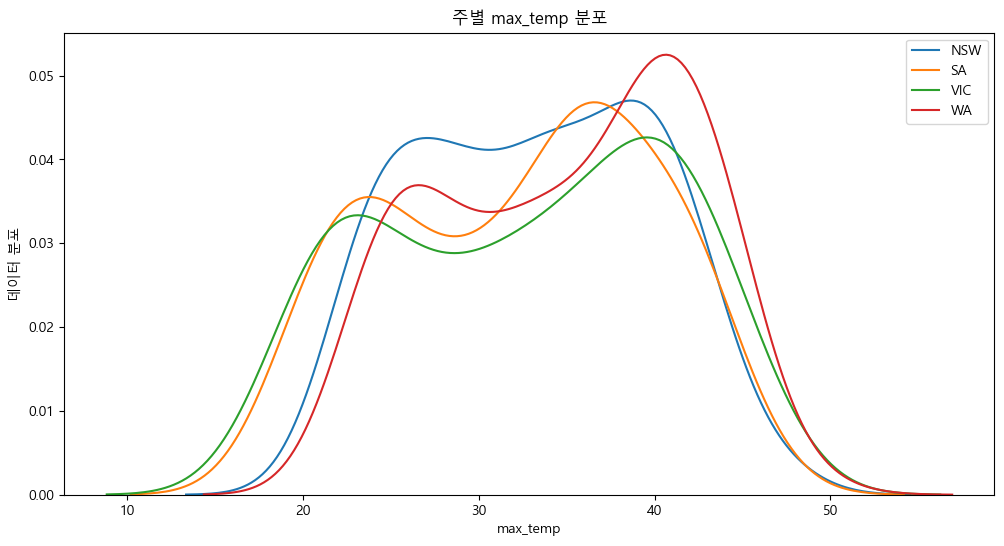

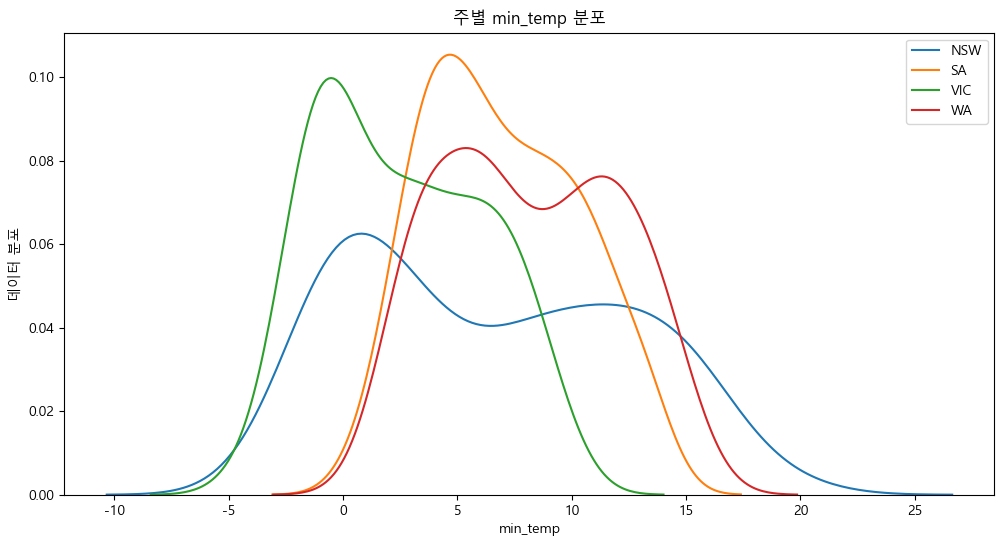

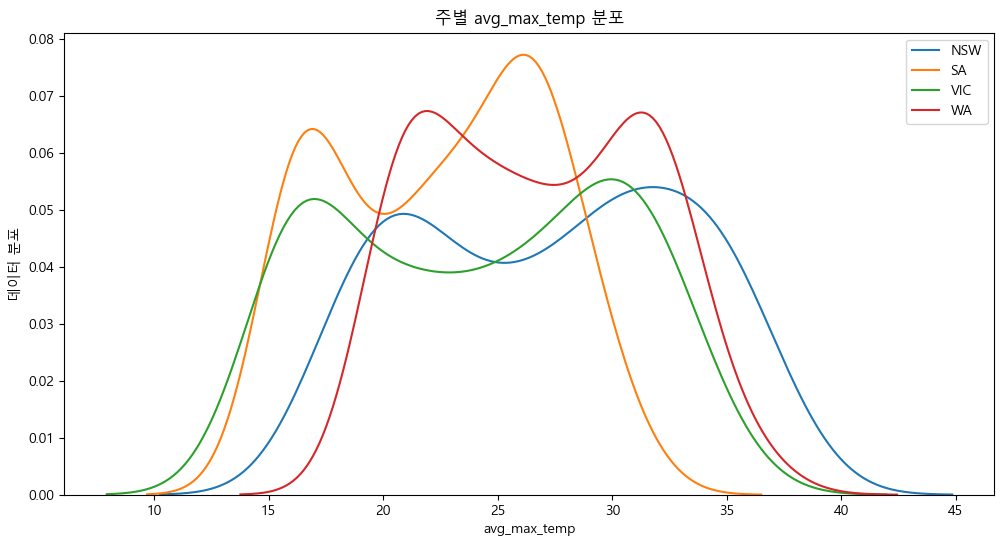

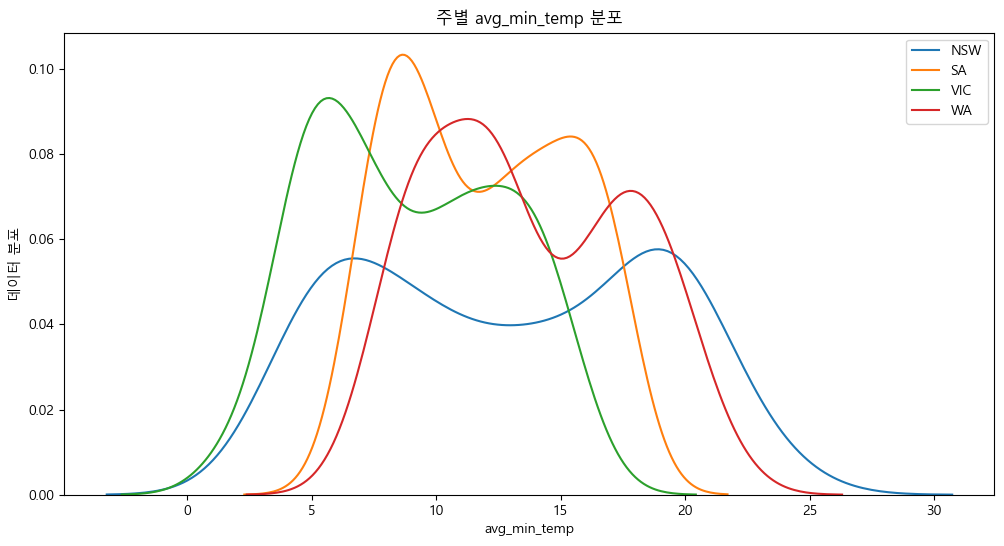

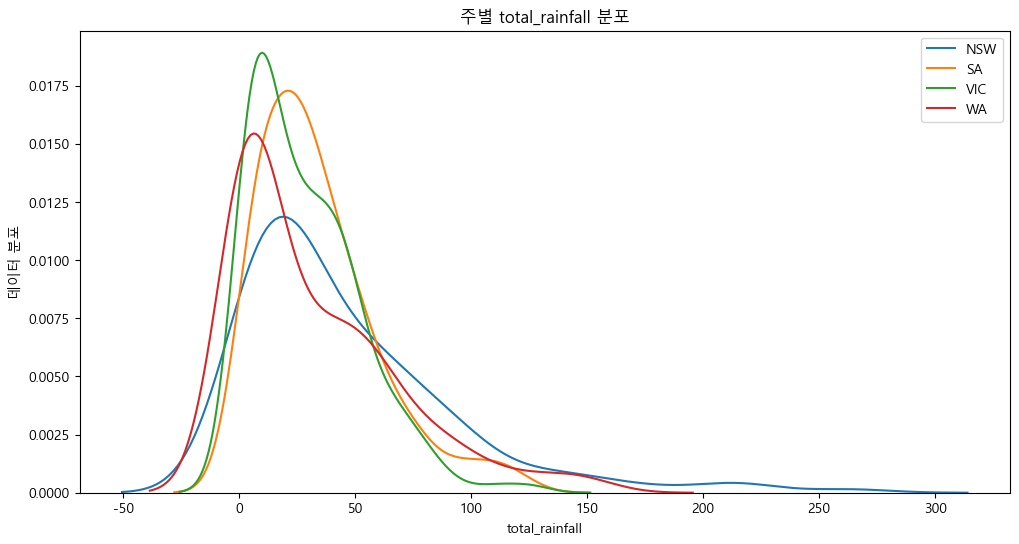

In [24]:

"""
Compare distributions of each feature across states, including avg_max_temp and avg_min_temp.
"""
# 확장된 피처 목록
features = ['max_temp', 'min_temp', 'avg_max_temp', 'avg_min_temp', 'total_rainfall']

for feature in features:
    plt.figure(figsize=(12, 6))
    for state, df in climate_dict_origin.items():
        sns.kdeplot(df[feature], label=state)
    plt.title(f"주별 {feature} 분포")
    plt.xlabel(feature)
    plt.ylabel("데이터 분포")
    plt.legend()
    plt.show()

### 3) 시계열 분석

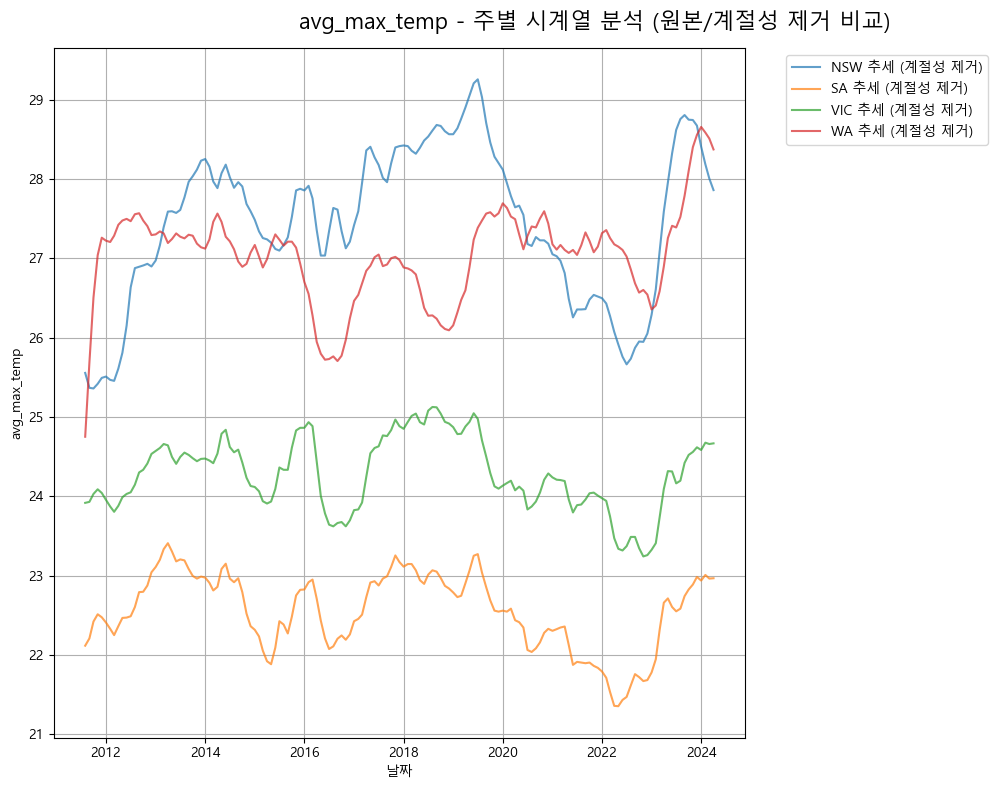

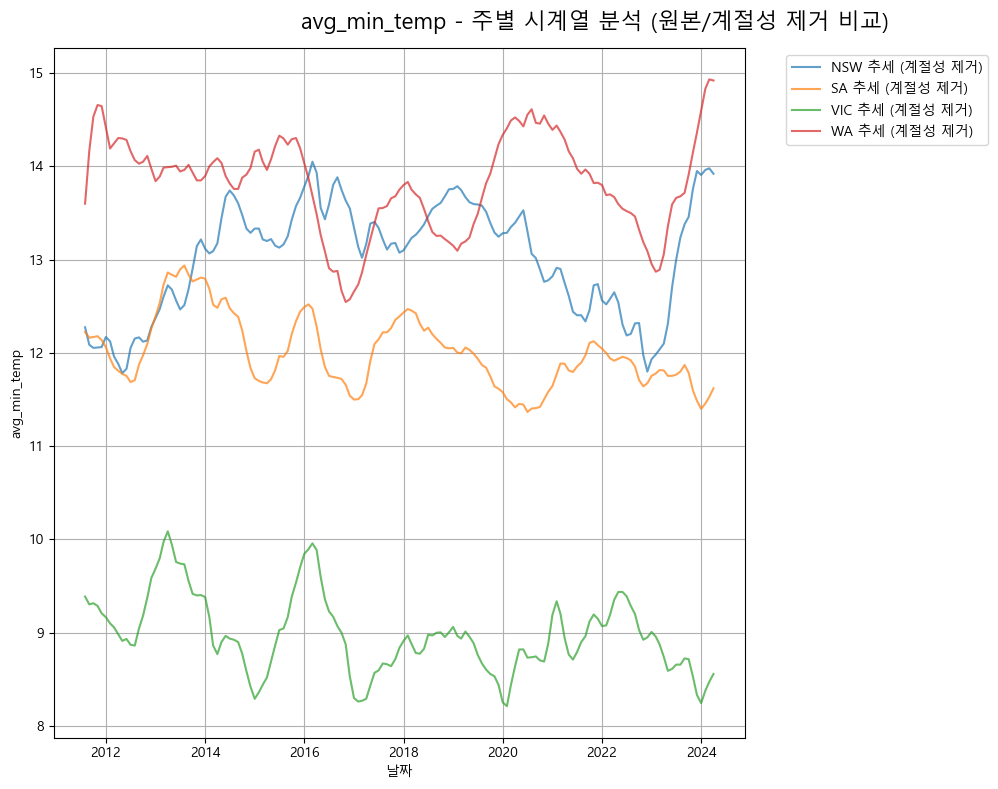

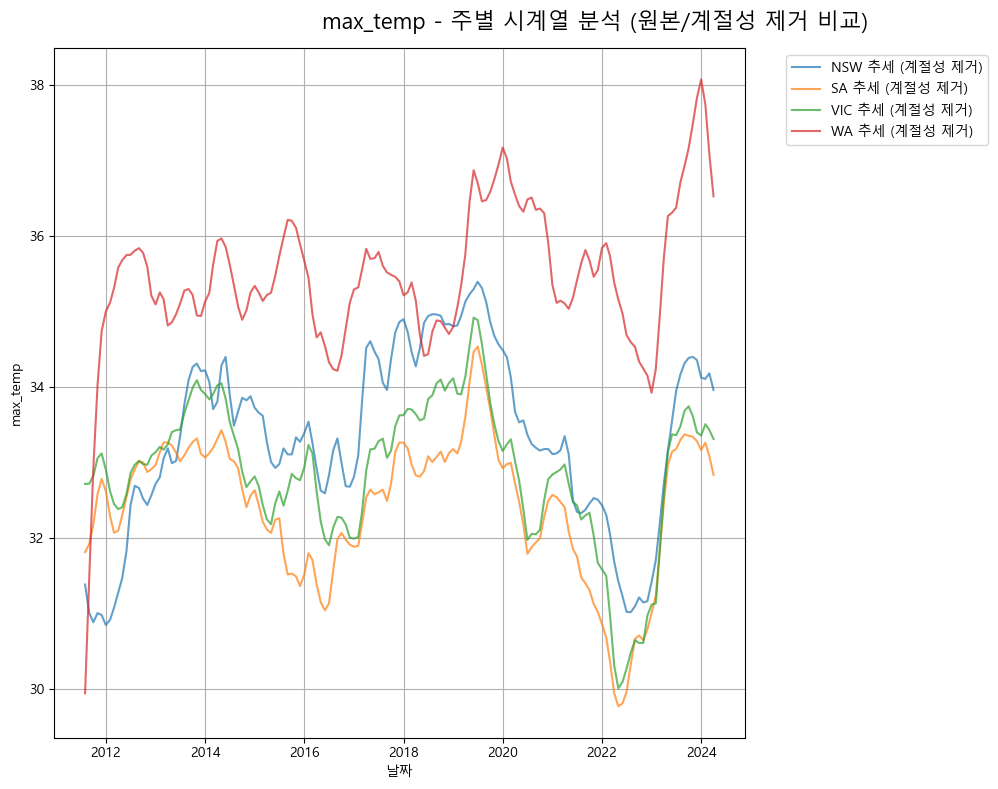

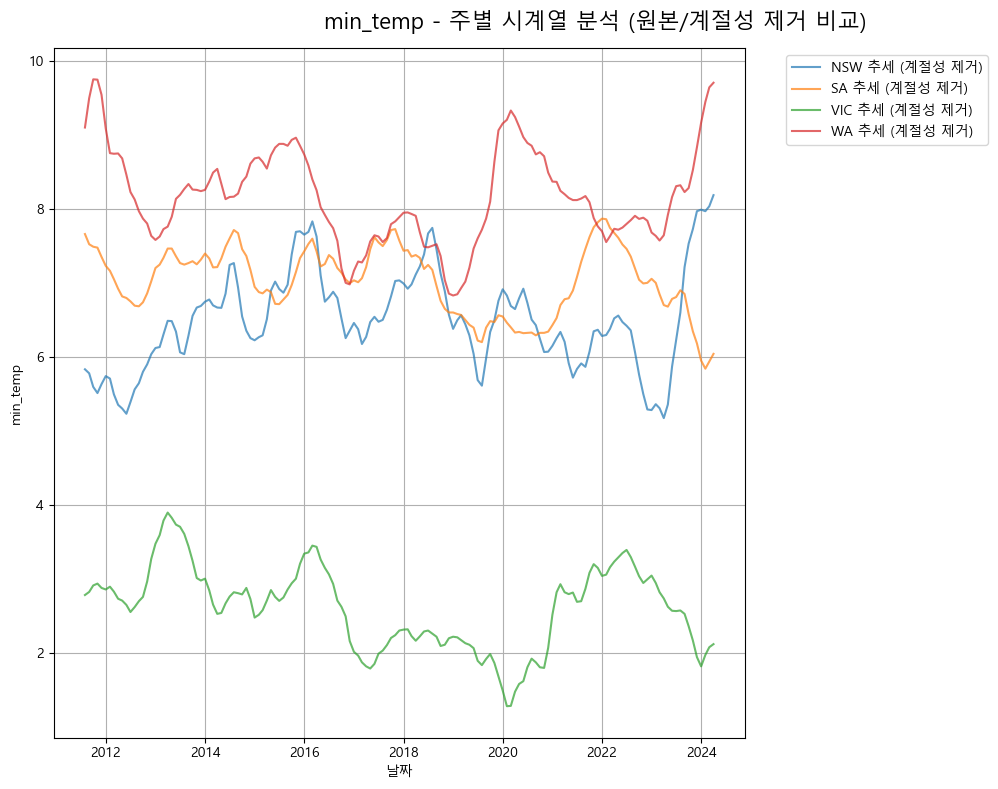

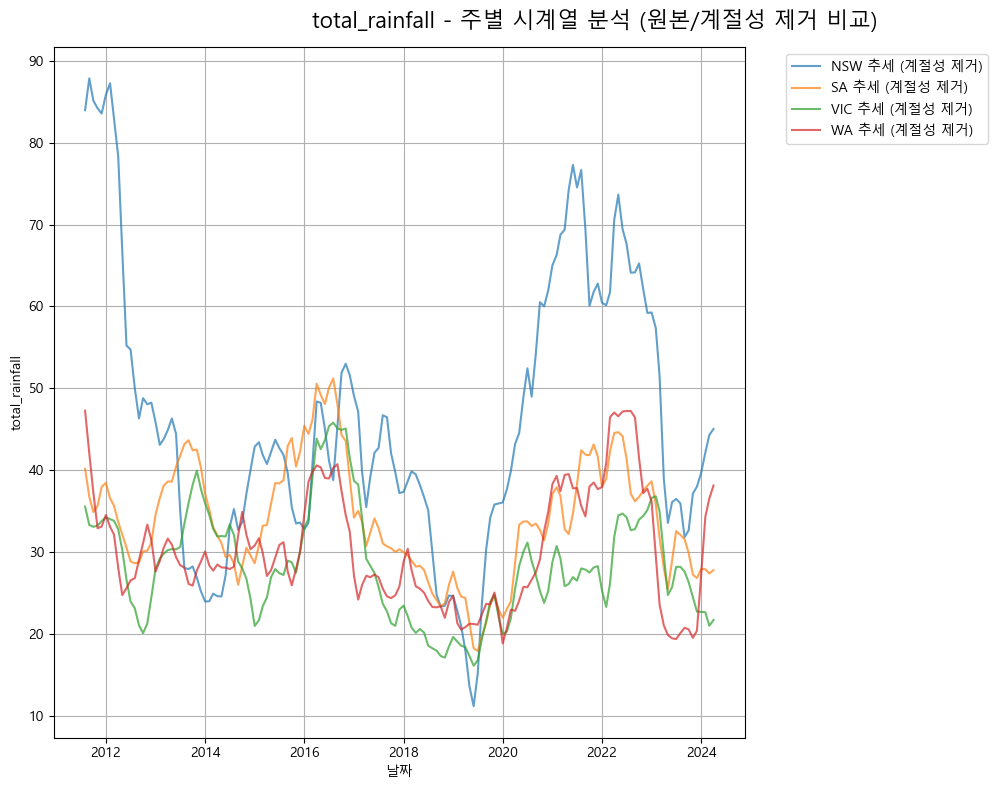

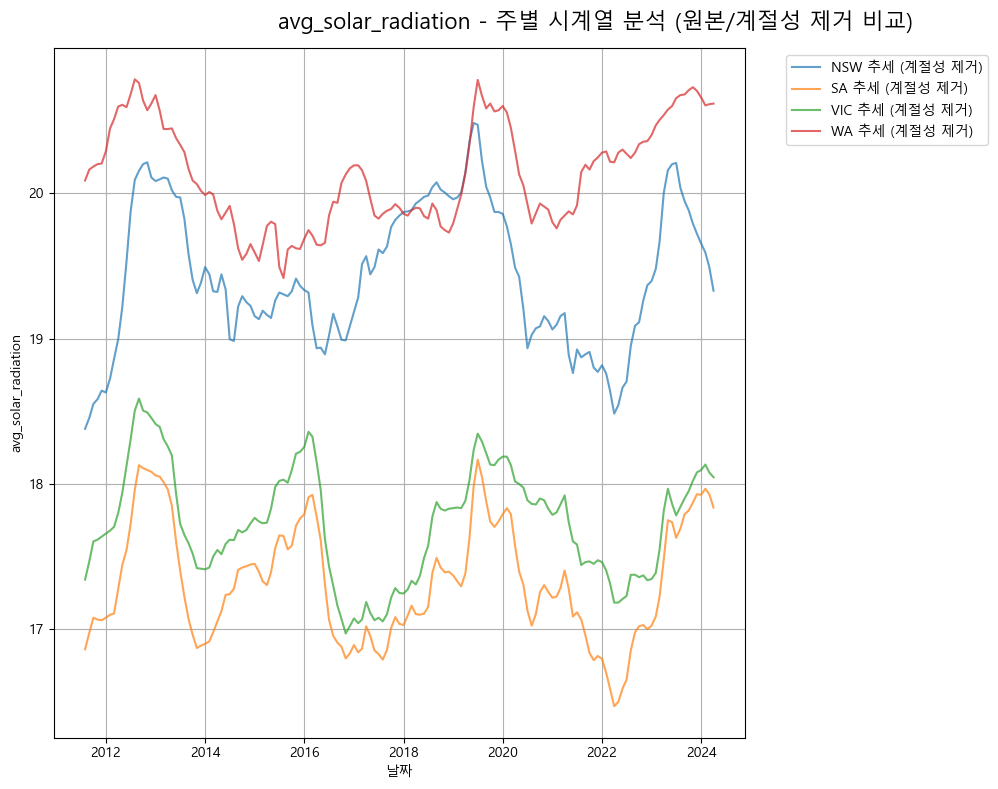

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def plot_feature_across_states_with_seasonality(feature, period=12):
    """
    특정 피처를 여러 주(State)에서 시계열 분석 및 계절성 제거 전후 비교
    :param feature: 분석할 피처 이름
    :param period: 시계열 분해를 위한 주기 (기본: 12개월)
    """
    plt.figure(figsize=(12, 8))
    plt.suptitle(f"{feature} - 주별 시계열 분석 (원본/계절성 제거 비교)", fontsize=16)

    for state_name, df in climate_dict_origin.items():
        # 데이터 준비
        ts = df.set_index('date')[feature].interpolate(method='linear')  # 결측치 처리
        result = seasonal_decompose(ts, model='additive', period=period)

        # 시각화: 원본 데이터와 계절성 제거 후 데이터 비교
        # plt.plot(ts, label=f"{state_name} 원본", alpha=0.5)  # 원본 데이터
        plt.plot(result.trend, label=f"{state_name} 추세 (계절성 제거)", alpha=0.7)  # 추세 데이터

    # 라벨과 스타일 설정
    plt.xlabel("날짜")
    plt.ylabel(feature)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 그래프 밖으로 배치
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # 그래프 크기 조정
    plt.show()

# 모든 피처에 대해 실행
for feature in features_lst:
    plot_feature_across_states_with_seasonality(feature)

<avg_max_temp 분석>
NSW 주


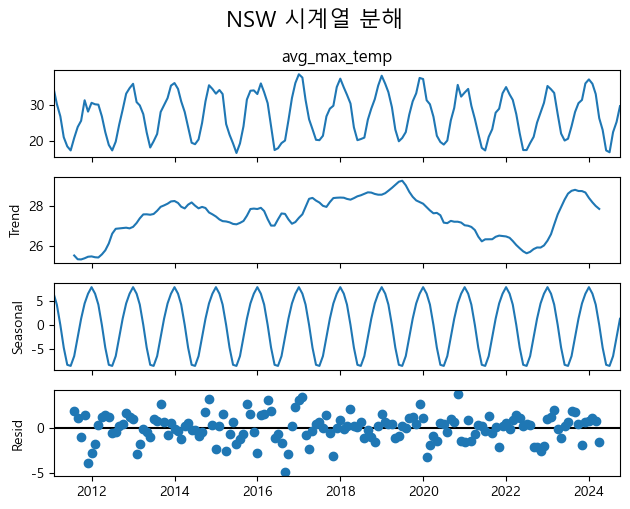

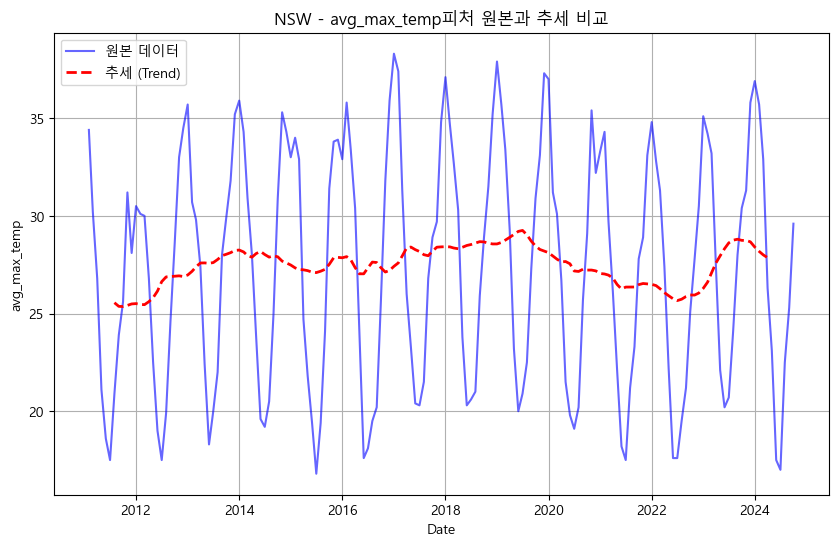

SA 주


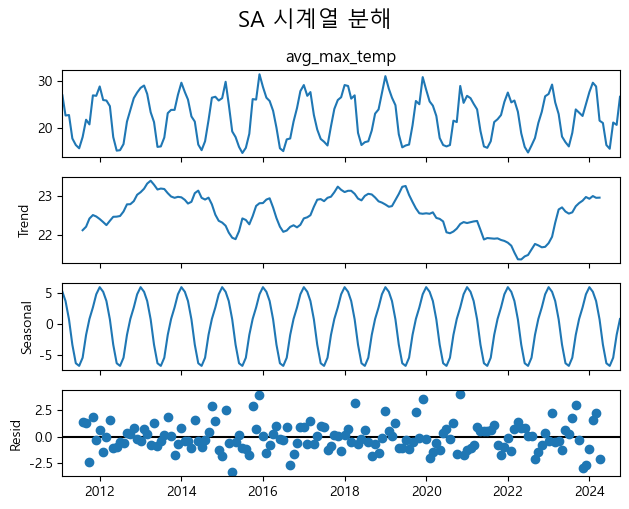

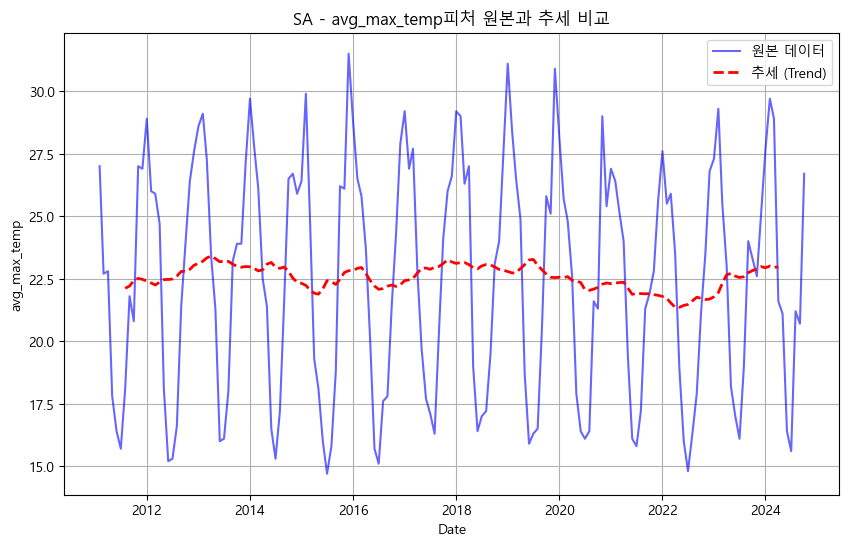

VIC 주


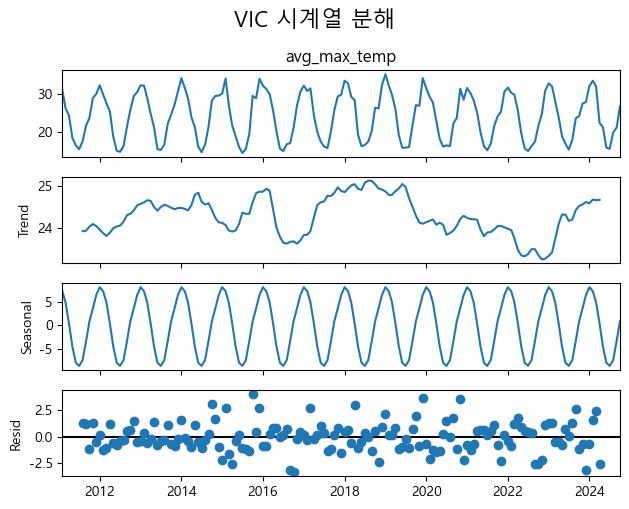

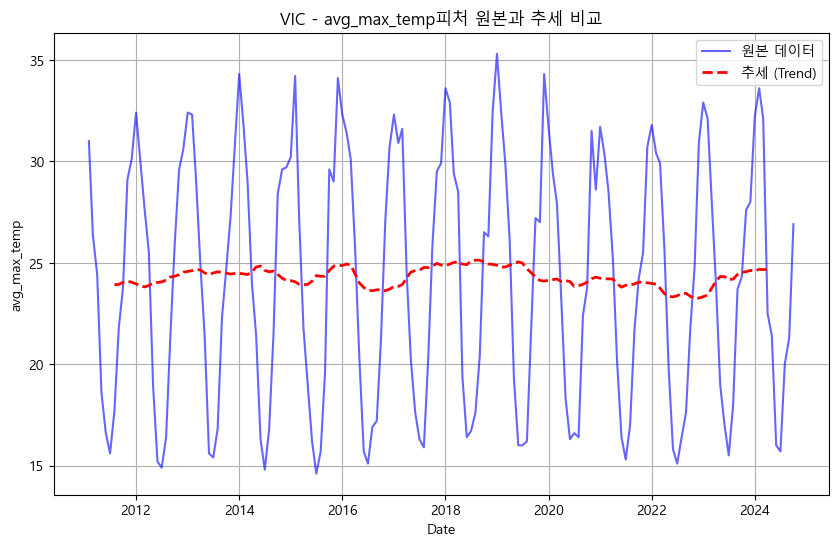

WA 주


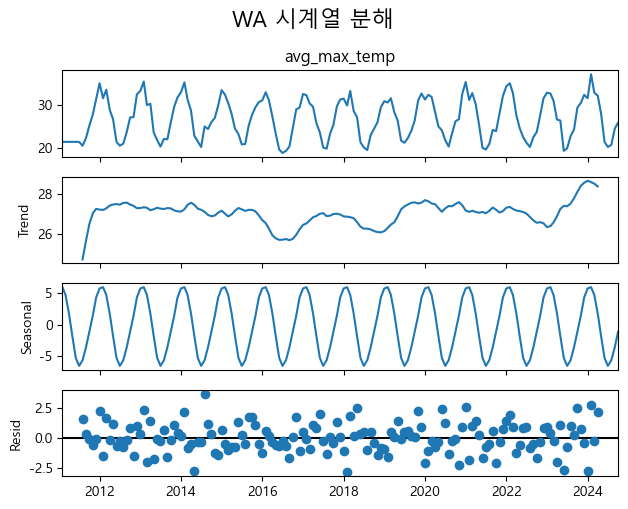

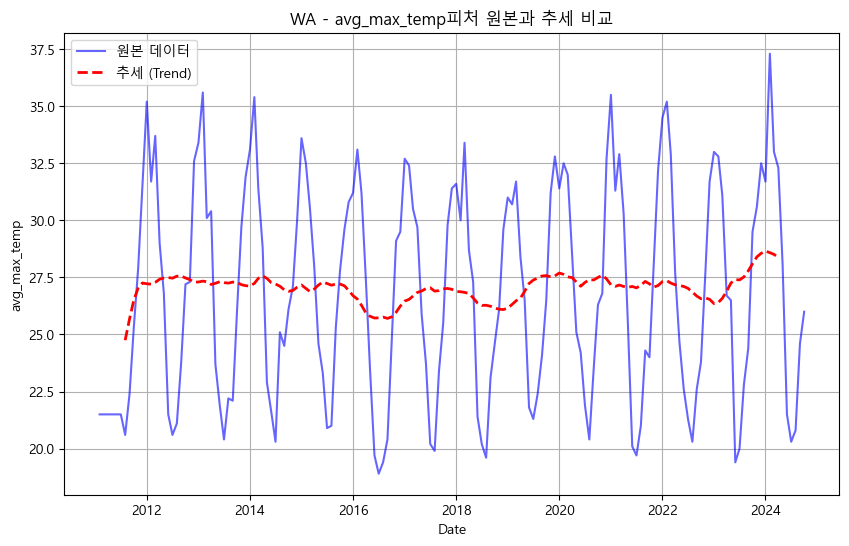

<avg_min_temp 분석>
NSW 주


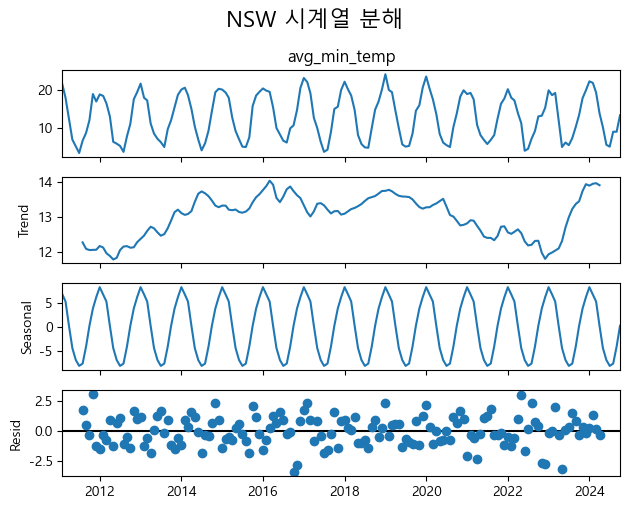

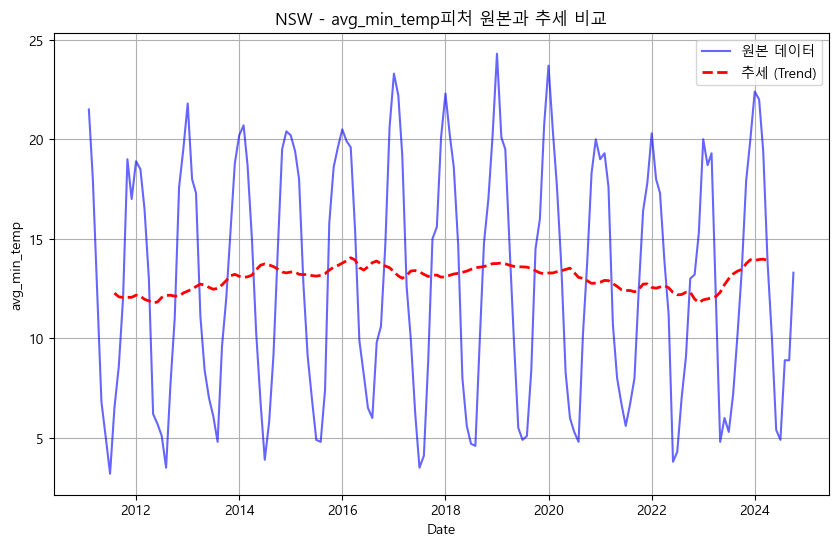

SA 주


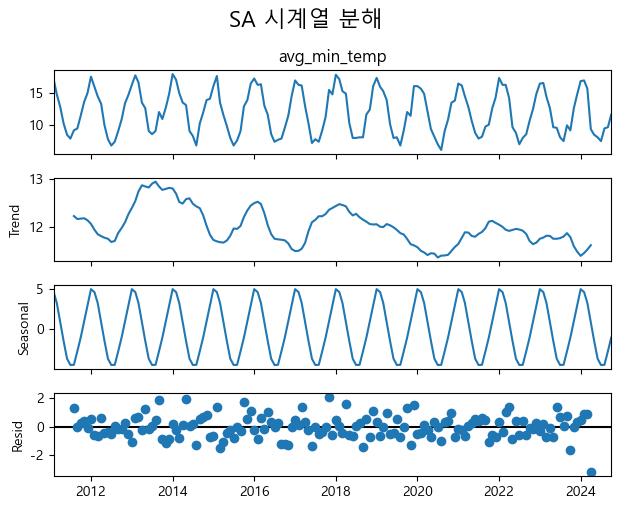

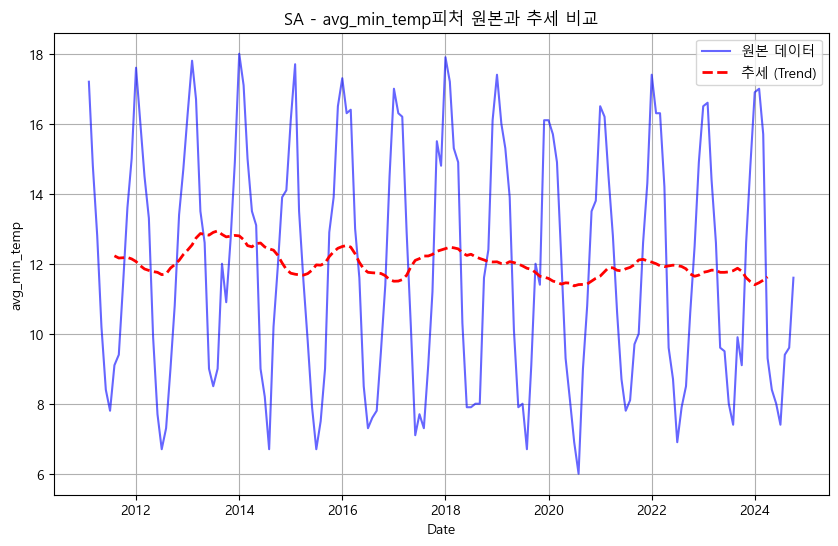

VIC 주


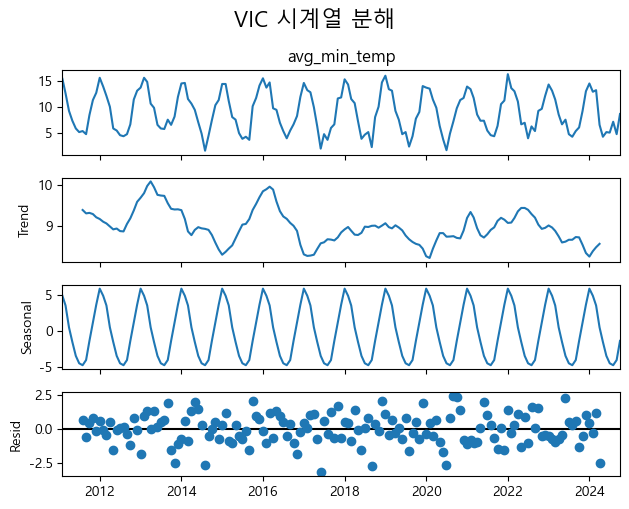

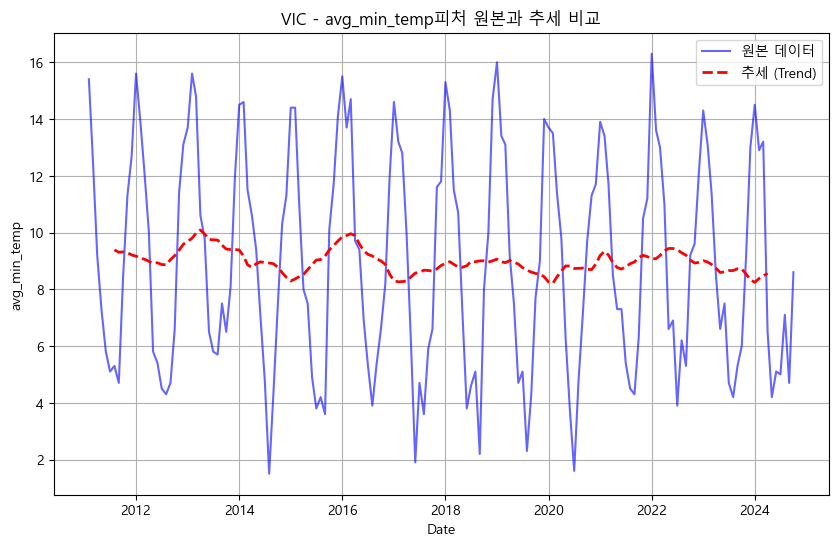

WA 주


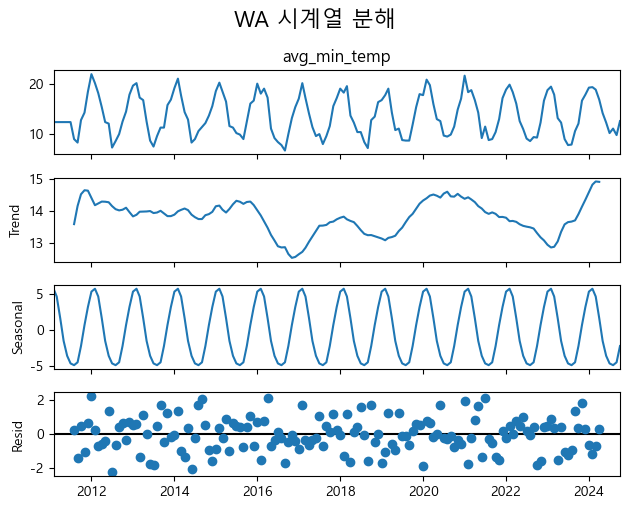

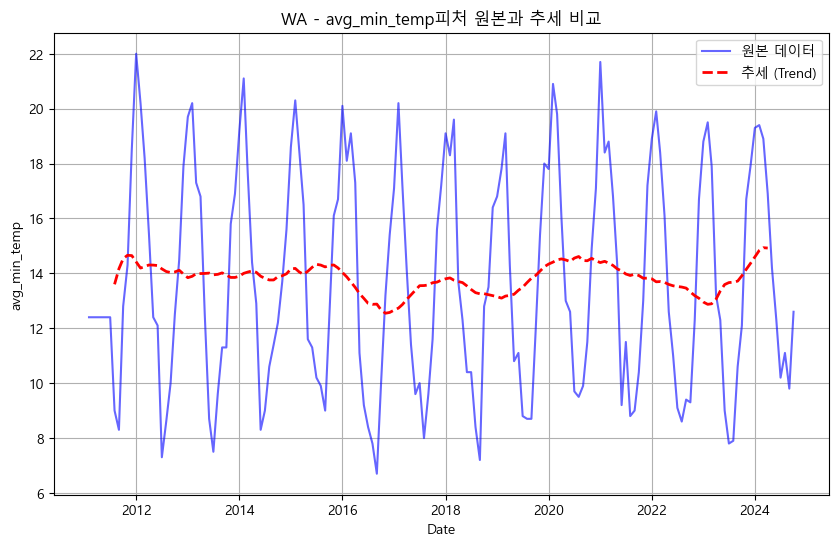

<max_temp 분석>
NSW 주


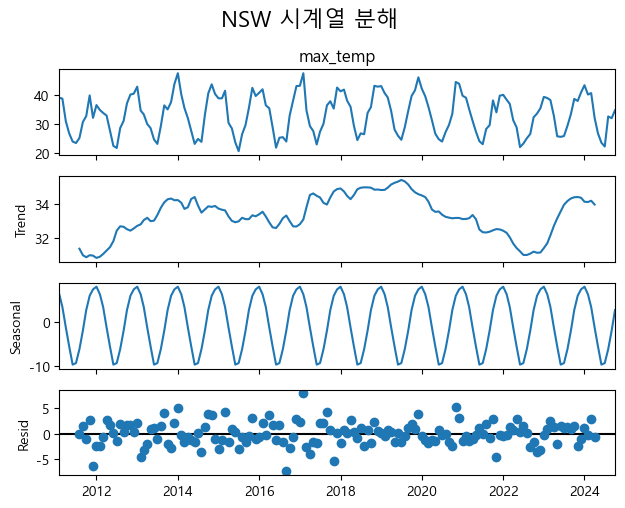

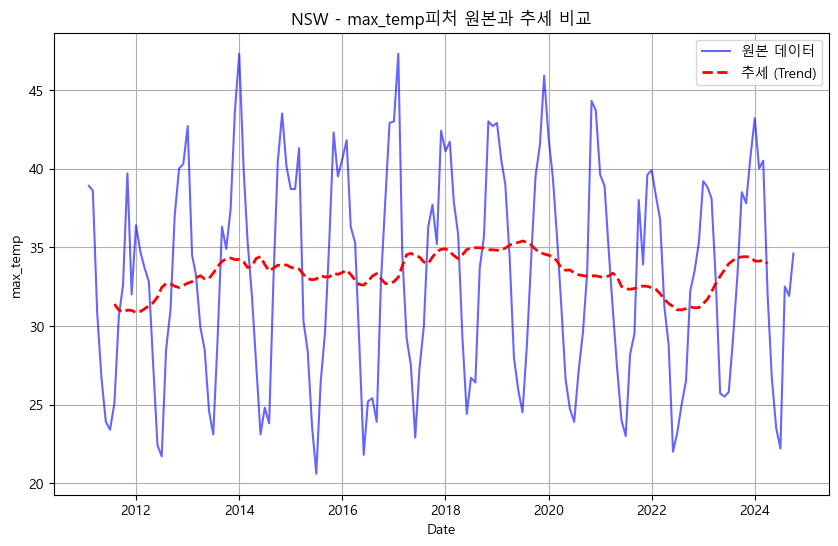

SA 주


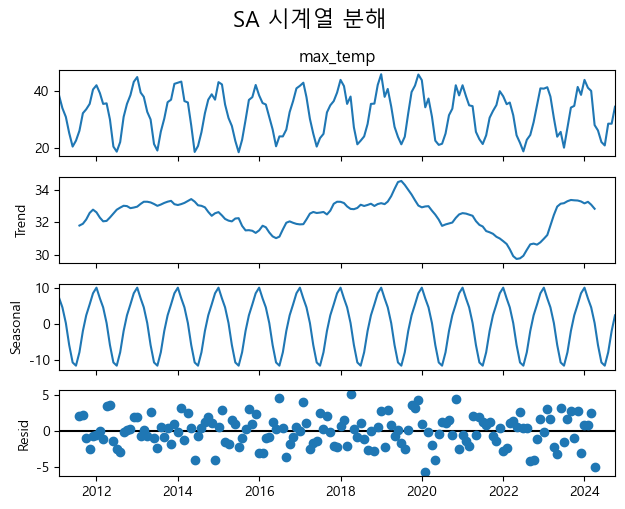

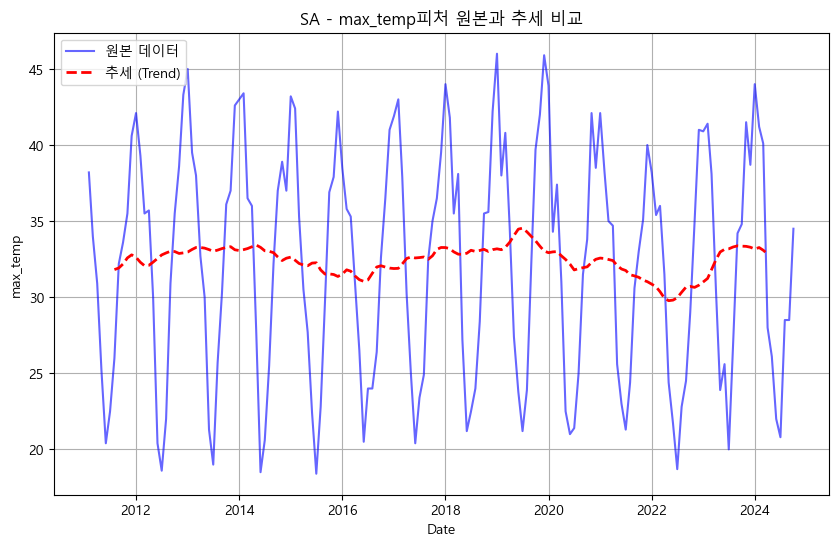

VIC 주


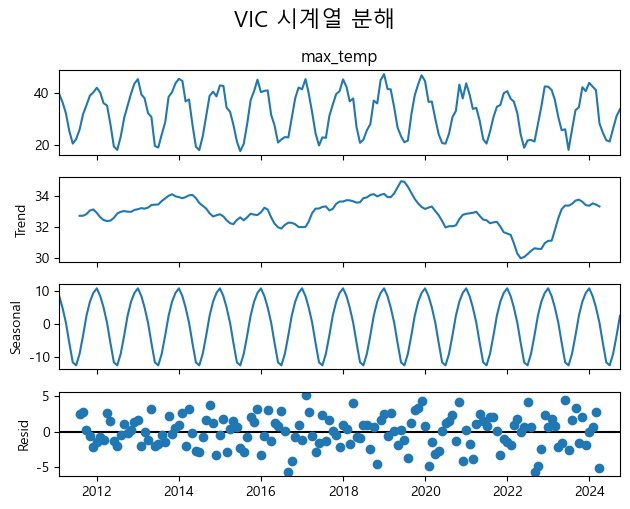

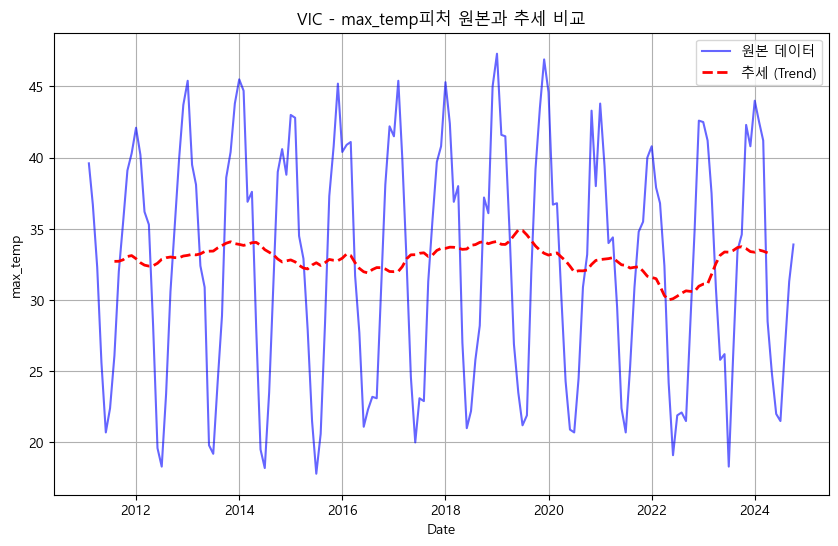

WA 주


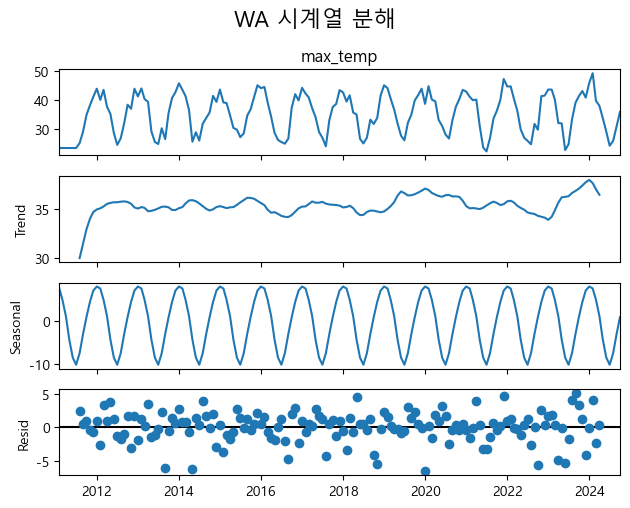

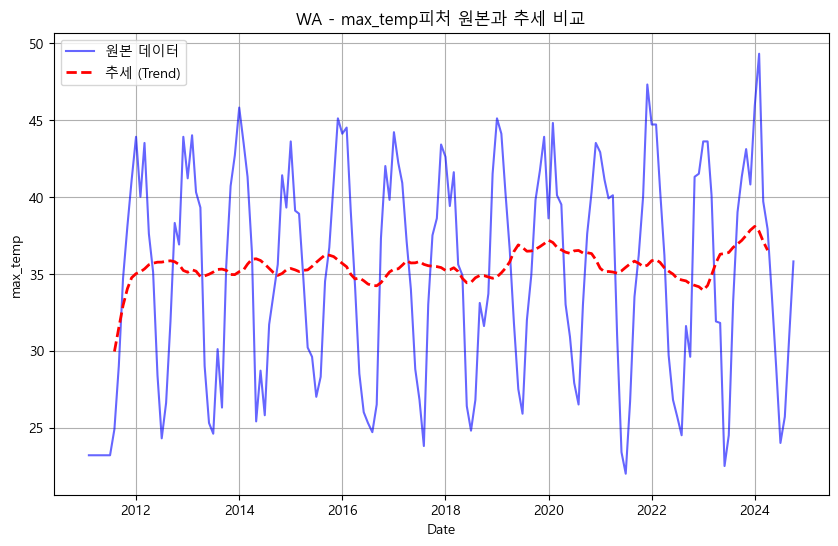

<min_temp 분석>
NSW 주


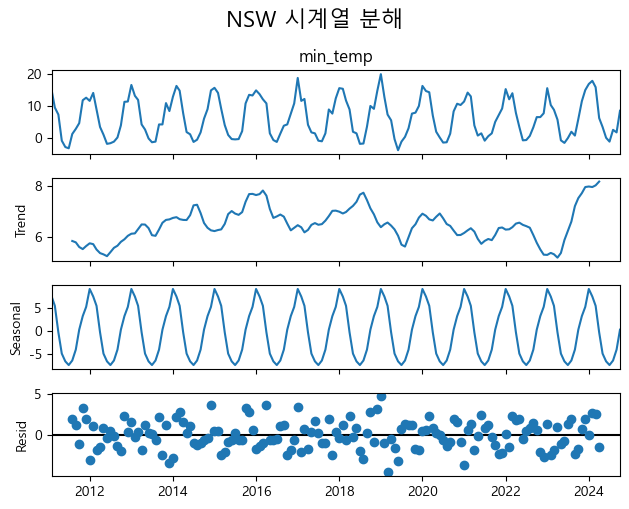

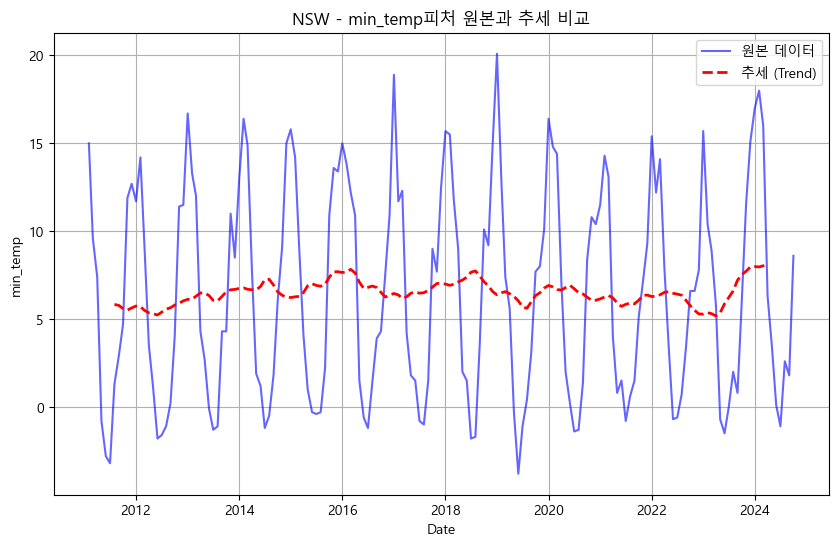

SA 주


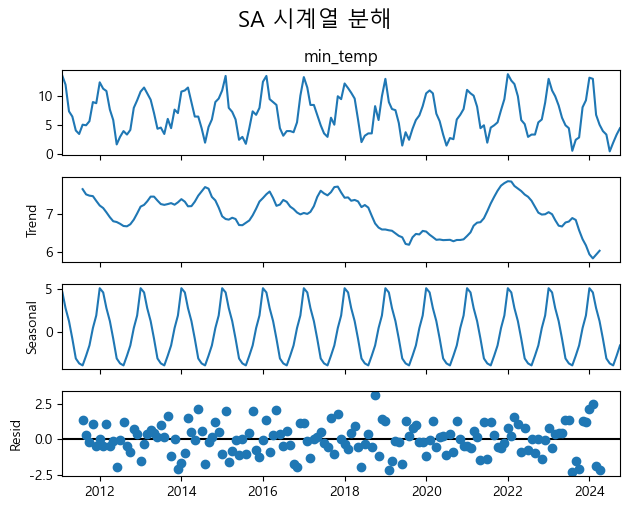

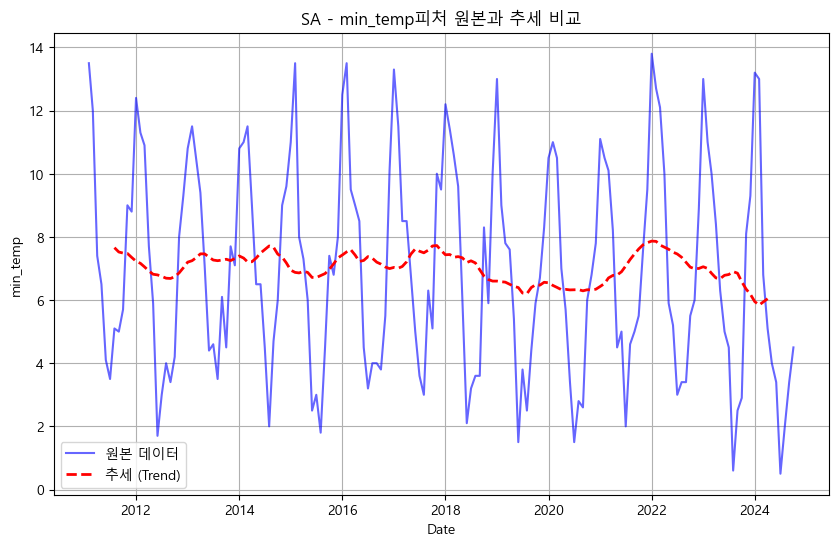

VIC 주


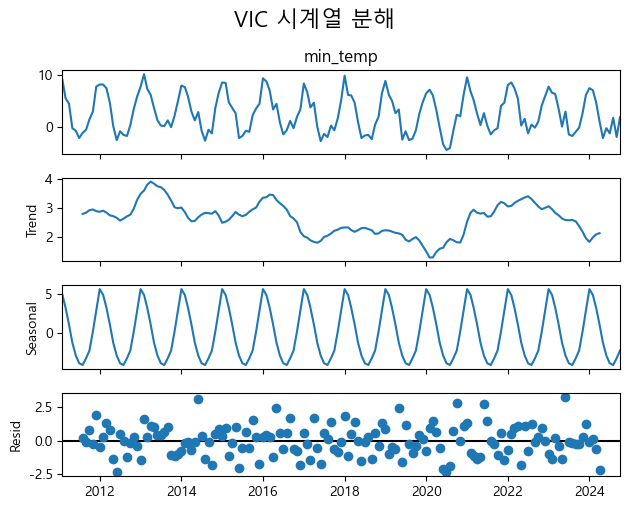

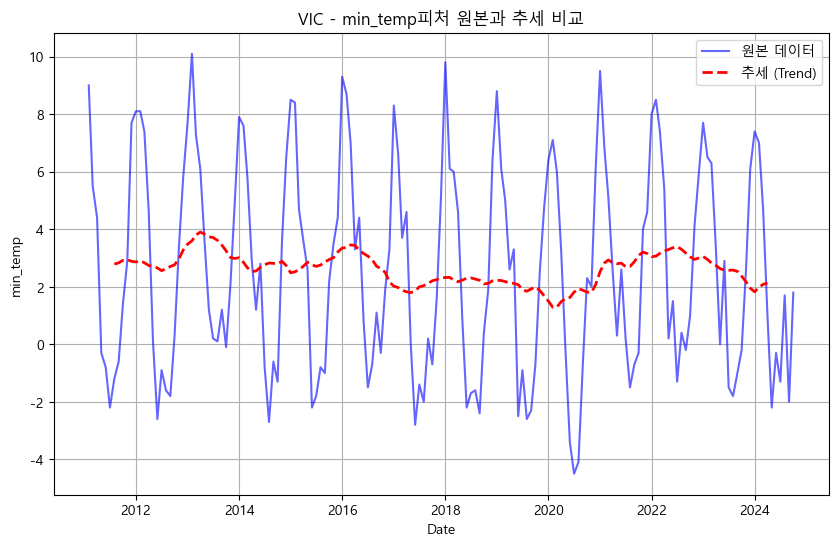

WA 주


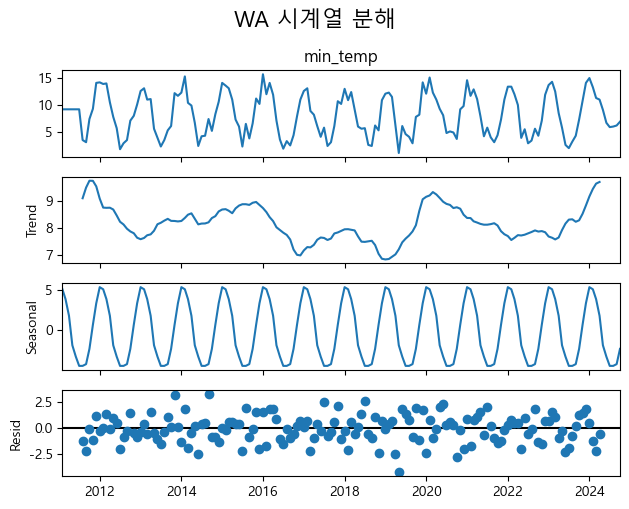

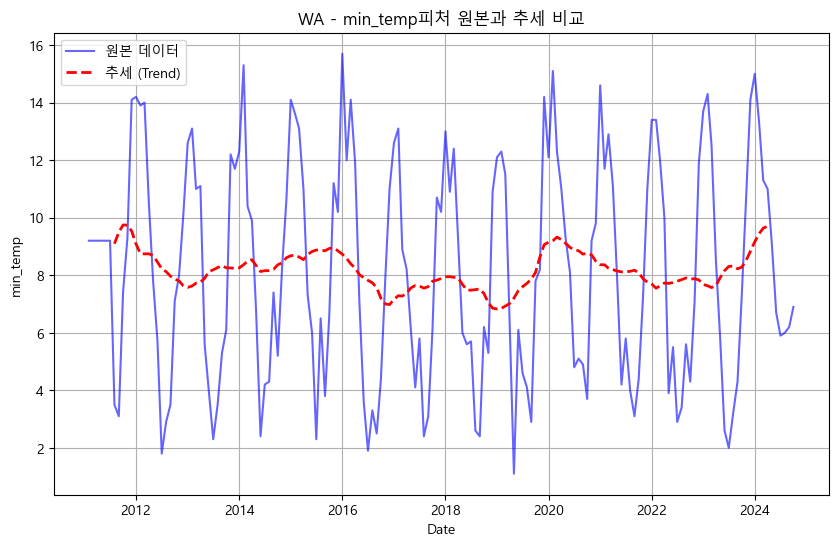

<total_rainfall 분석>
NSW 주


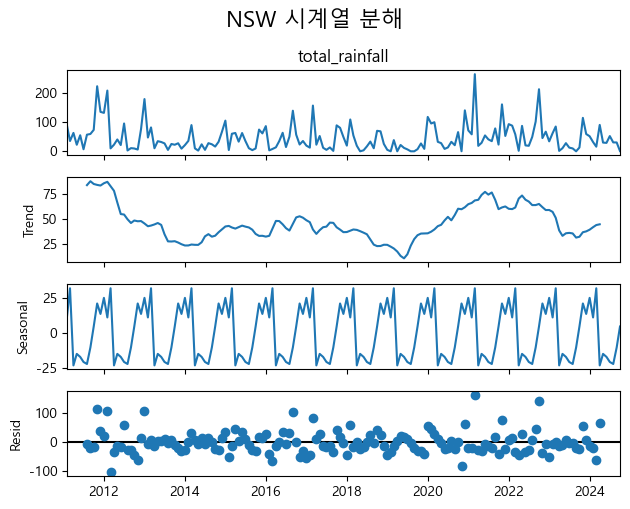

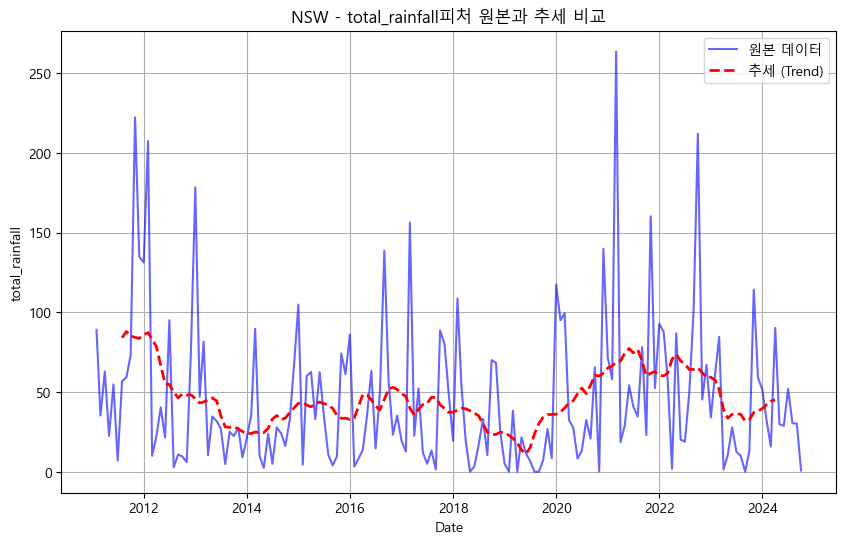

SA 주


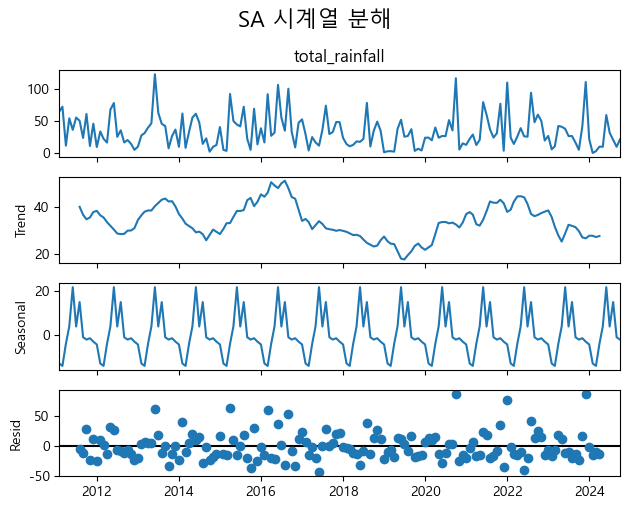

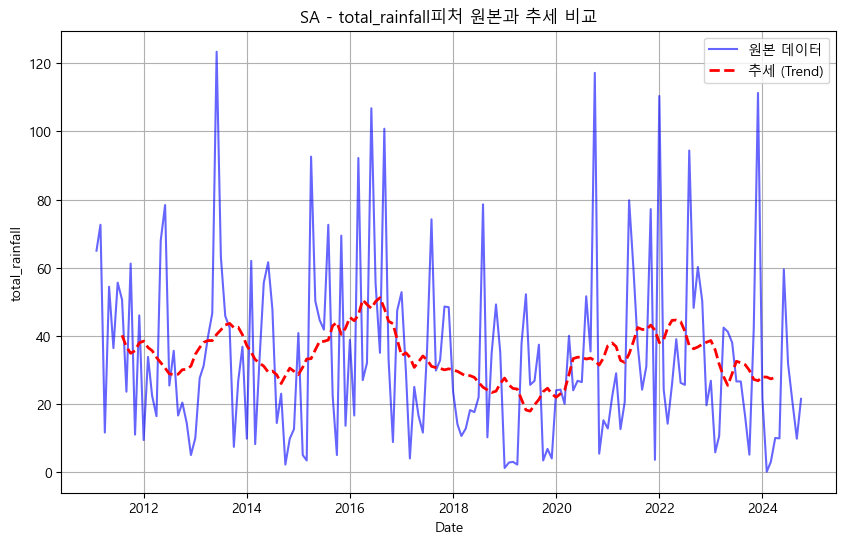

VIC 주


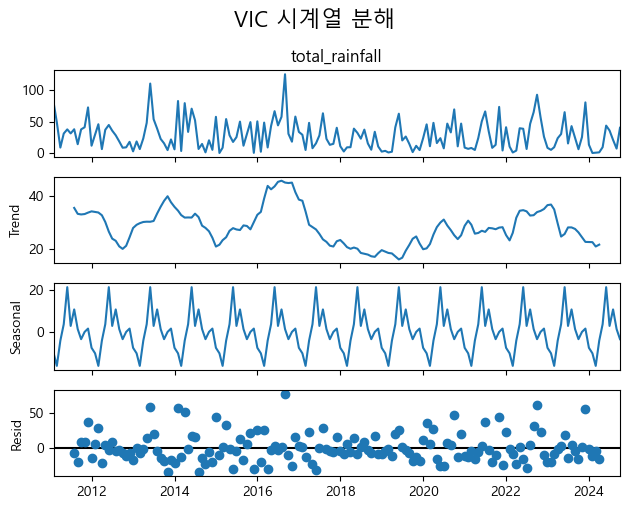

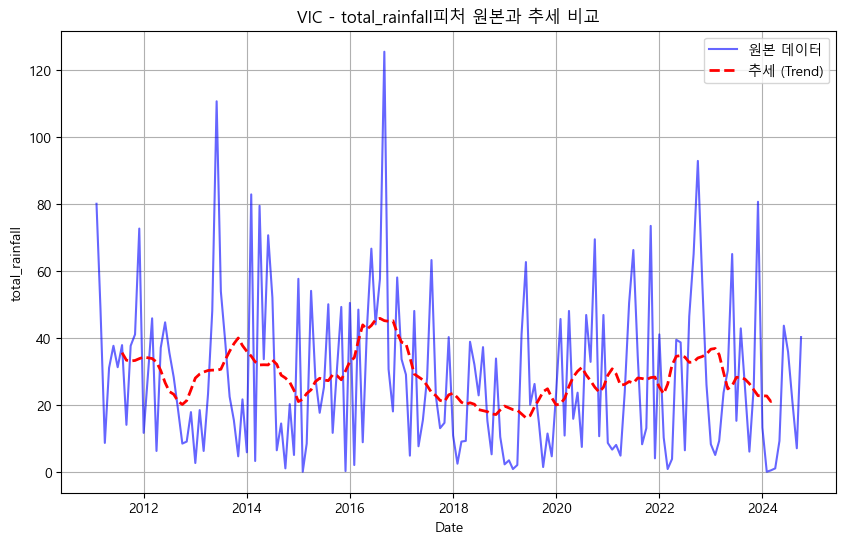

WA 주


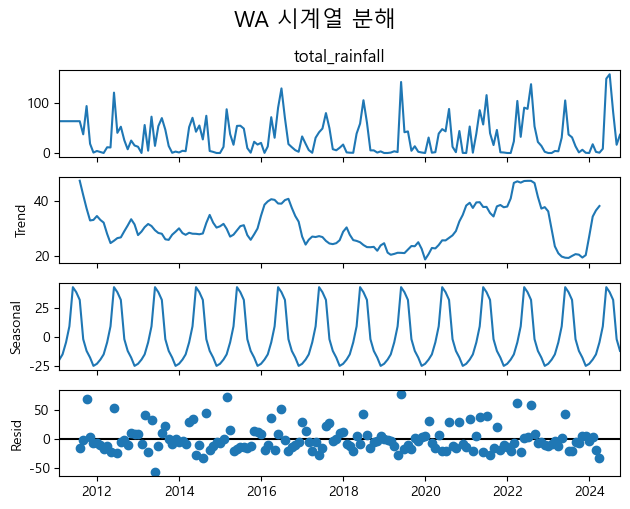

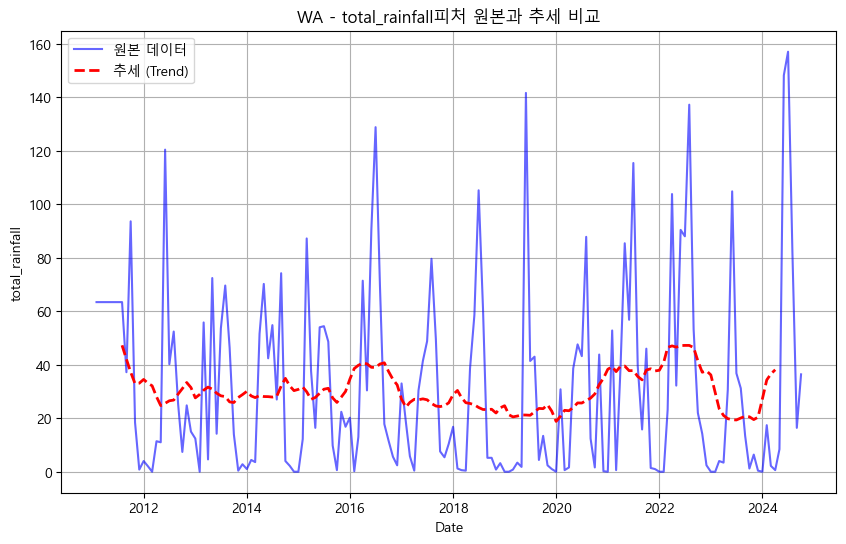

<avg_solar_radiation 분석>
NSW 주


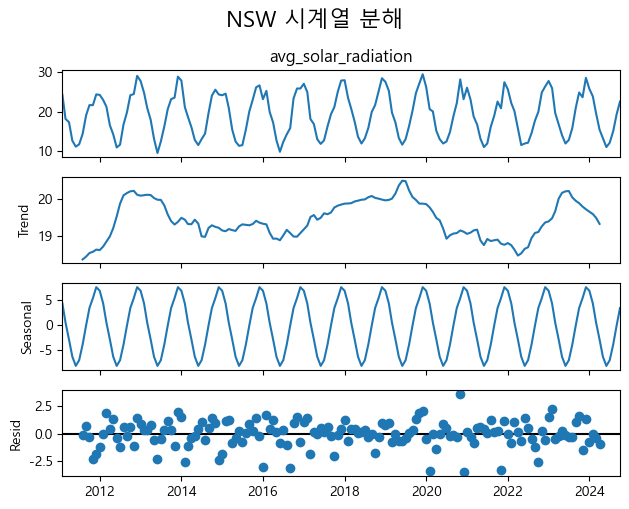

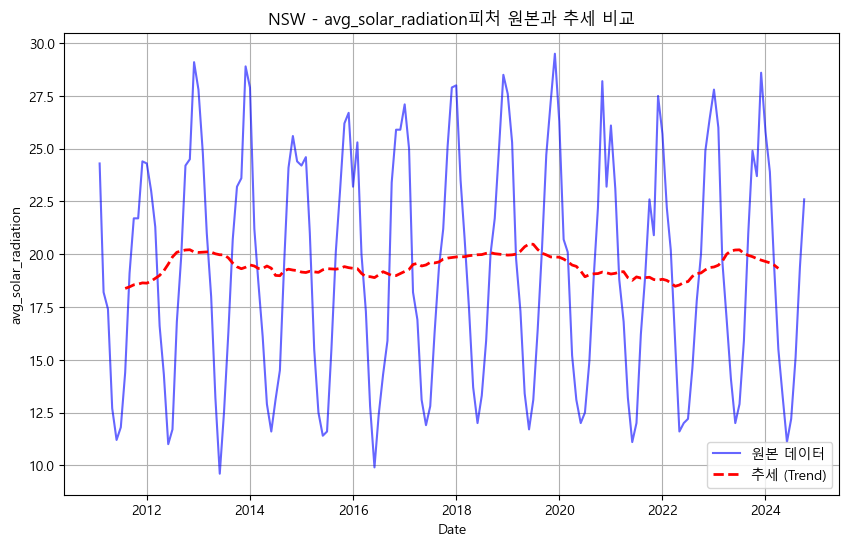

SA 주


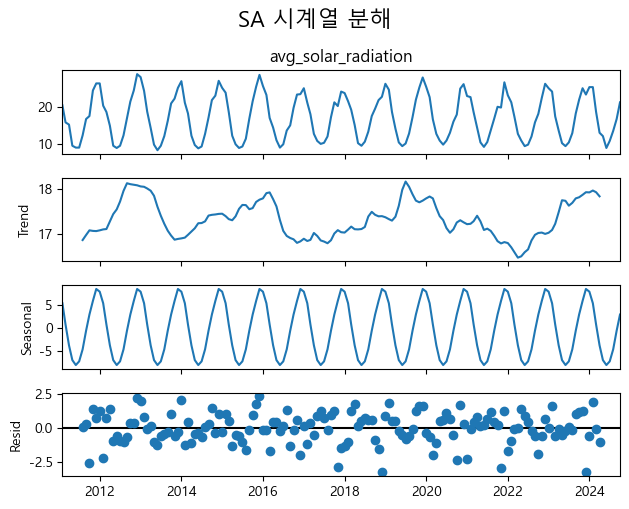

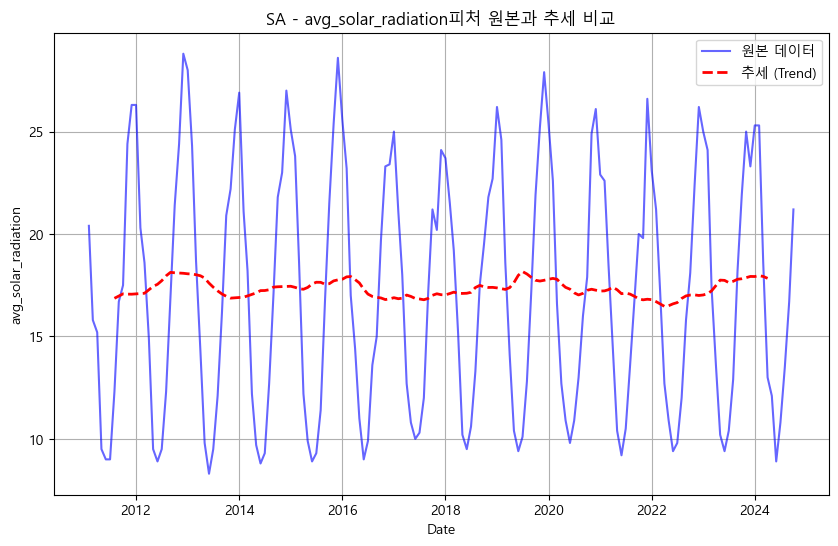

VIC 주


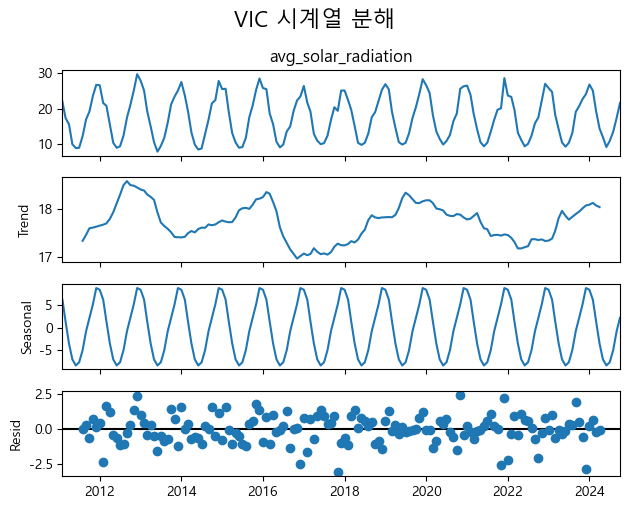

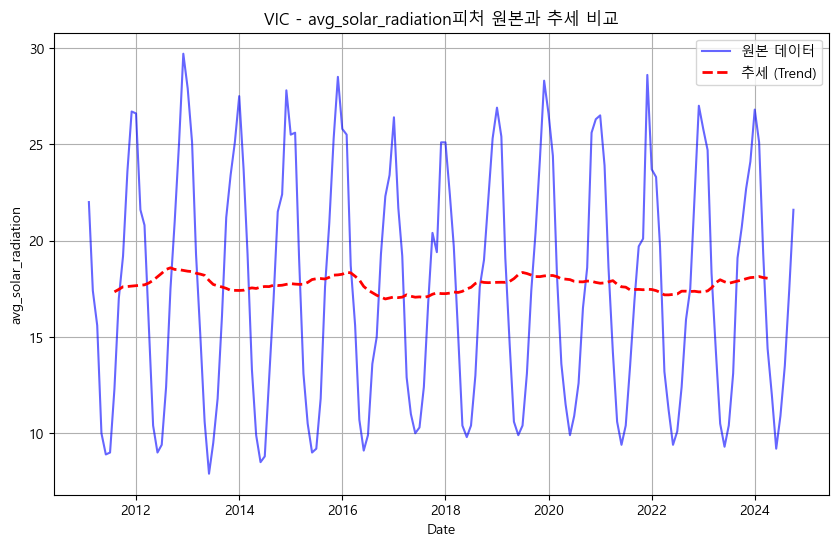

WA 주


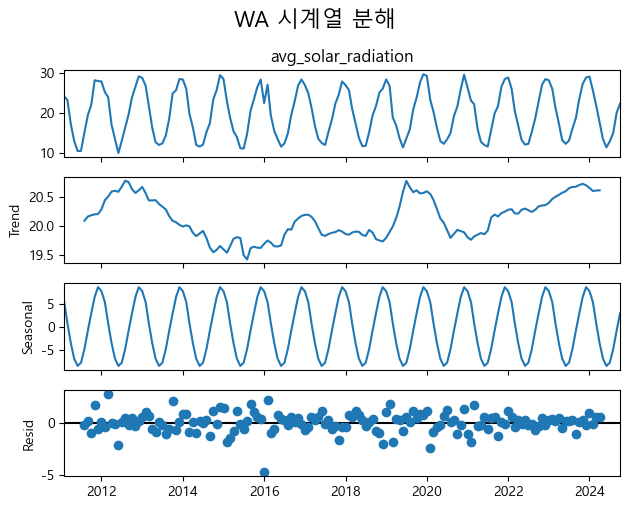

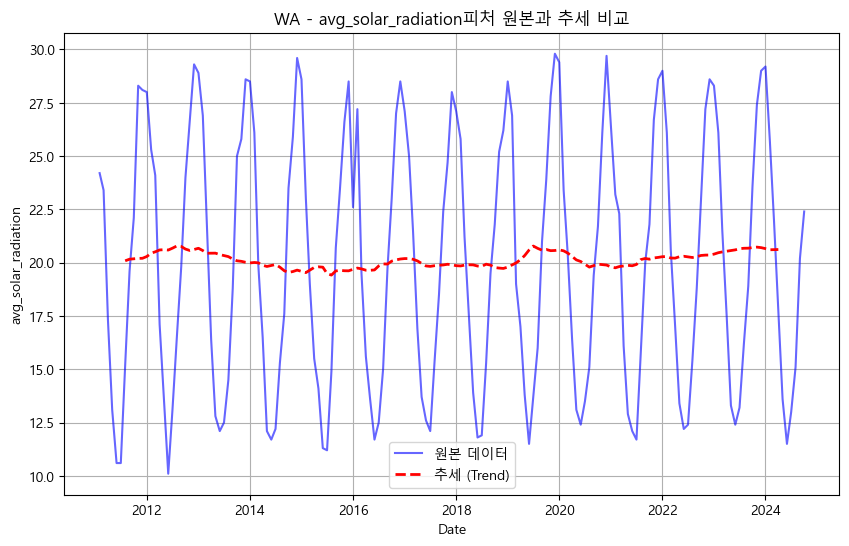

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_features_across_datasets(features, period=12):
    """
    동일한 피처를 여러 데이터셋 간에 비교하고, 시계열 분해 분석 수행
    :param features: 분석할 피처 리스트
    :param period: 시계열 분해를 위한 주기 (기본: 12개월)
    """
    for feature in features:
        print(f"<{feature} 분석>")

        # 각 주(State)별 데이터 시계열 분해
        for state_name, df in climate_dict_origin.items():
            print(f"{state_name} 주")
            
            # 결측치 처리 (선형 보간법)
            ts = df.set_index('date')[feature].interpolate(method='linear')  # 시계열 데이터
            result = seasonal_decompose(ts, model='additive', period=period)

            # 시각화: 시계열 분해 결과
            result.plot()
            plt.suptitle(f"{state_name} 시계열 분해", fontsize=16, y=1.05) 
            plt.show()

            # 시각화: 원본과 추세 비교
            plt.figure(figsize=(10, 6))
            plt.plot(ts, label='원본 데이터', color='blue', alpha=0.6)
            plt.plot(result.trend, label='추세 (Trend)', color='red', linestyle='--', linewidth=2)
            plt.title(f"{state_name} - {feature}피처 원본과 추세 비교")
            plt.xlabel("Date")
            plt.ylabel(feature)
            plt.legend()
            plt.grid(True)
            plt.show()

decompose_features_across_datasets(features_lst, period=12)

# 이상 기후

In [46]:
import pandas as pd

# BOM 기준 정의
criteria = {
    'Heatwave': {'max_temp': 40, 'avg_temp_increase': 5, 'consecutive_days': 3},
    'Flood': {'total_rainfall': {'NSW': 200, 'SA': 150, 'VIC': 180, 'WA': 160}},  # mm
    'Drought': {'rainfall_percentage': 0.6},  # 60% of mean rainfall
    'HeavyRainfall': {'daily_rainfall': 50},  # mm
}

# 이상 기후 탐지 함수
def detect_anomalies(df, state, criteria):
    anomalies = {}
    
    # Heatwave detection
    heatwave = df[df['max_temp'] > criteria['Heatwave']['max_temp']]
    consecutive_heatwave = (
        df[df['avg_max_temp'] > df['avg_max_temp'].mean() + criteria['Heatwave']['avg_temp_increase']]
        .groupby(['year', 'month'])
        .size()
        .reset_index(name='streak')
    )
    anomalies['Heatwave'] = pd.concat([
        heatwave,
        consecutive_heatwave[consecutive_heatwave['streak'] >= criteria['Heatwave']['consecutive_days']]
    ])
    
    # Flood detection
    flood_threshold = criteria['Flood']['total_rainfall'][state]
    anomalies['Flood'] = df[df['total_rainfall'] > flood_threshold]
    
    # Drought detection
    drought_threshold = df['total_rainfall'].mean() * criteria['Drought']['rainfall_percentage']
    anomalies['Drought'] = df[df['total_rainfall'] < drought_threshold]
    
    # Heavy Rainfall detection
    anomalies['HeavyRainfall'] = df[df['total_rainfall'] > criteria['HeavyRainfall']['daily_rainfall']]
    
    # 연도별 집계 추가
    yearly_counts = {}
    for disaster, data in anomalies.items():
        yearly_counts[disaster] = data.groupby('year').size()
    
    return anomalies, yearly_counts


# 주별 이상 기후 탐지
state_dfs = {'NSW': nsw_df, 'SA': sa_df, 'VIC': vic_df, 'WA': wa_df}
anomalies, yearly_counts = detect_anomalies(df, state, criteria)

anomalies = {
    state: anomalies
    for state, df in state_dfs.items()
}

  State  Heatwave  Flood  Drought  HeavyRainfall
0   NSW        52      0       86             44
1    SA        52      0       86             44
2   VIC        52      0       86             44
3    WA        52      0       86             44


<Figure size 1000x600 with 0 Axes>

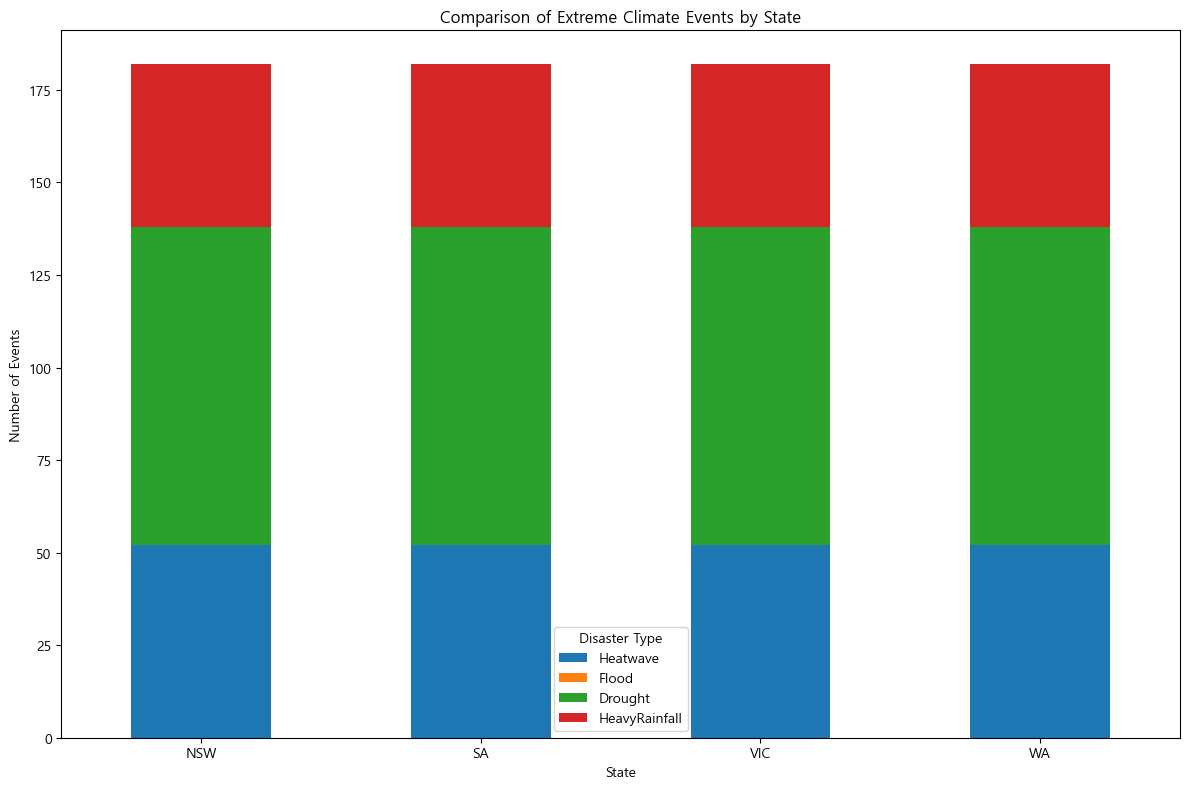

In [47]:
import matplotlib.pyplot as plt

# 집계: 이상 기후의 발생 횟수를 주별로 정리
anomaly_counts = {
    state: {disaster: len(data) for disaster, data in results.items()}
    for state, results in anomalies.items()
}

# DataFrame으로 변환
anomaly_df = pd.DataFrame(anomaly_counts).T  # Transpose for easier plotting
anomaly_df.index.name = "State"
anomaly_df.reset_index(inplace=True)

# DataFrame 출력
print(anomaly_df)

# 시각화: Bar Chart
plt.figure(figsize=(10, 6))
anomaly_df.set_index('State').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Comparison of Extreme Climate Events by State')
plt.ylabel('Number of Events')
plt.xlabel('State')
plt.legend(title='Disaster Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


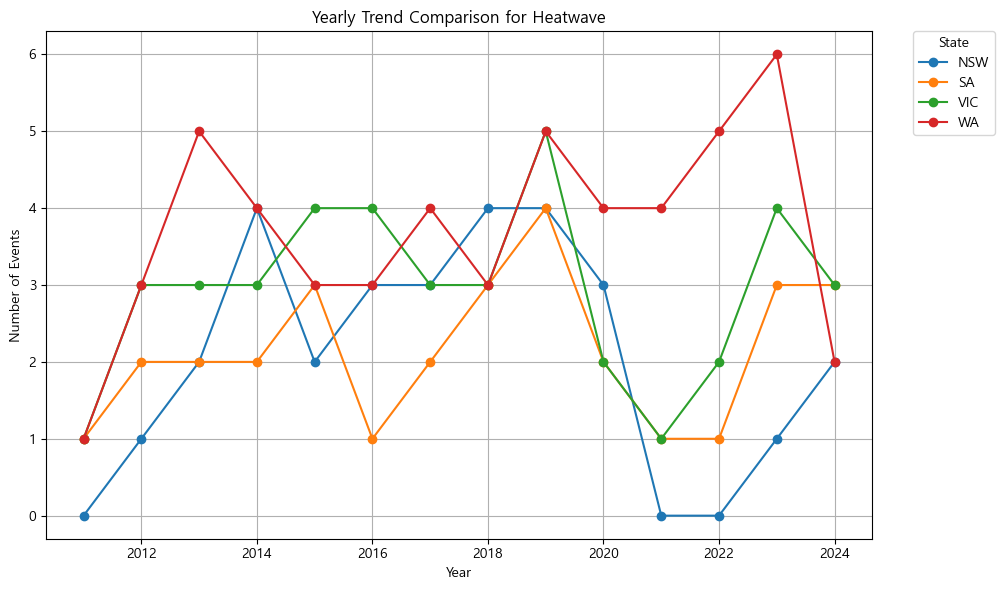

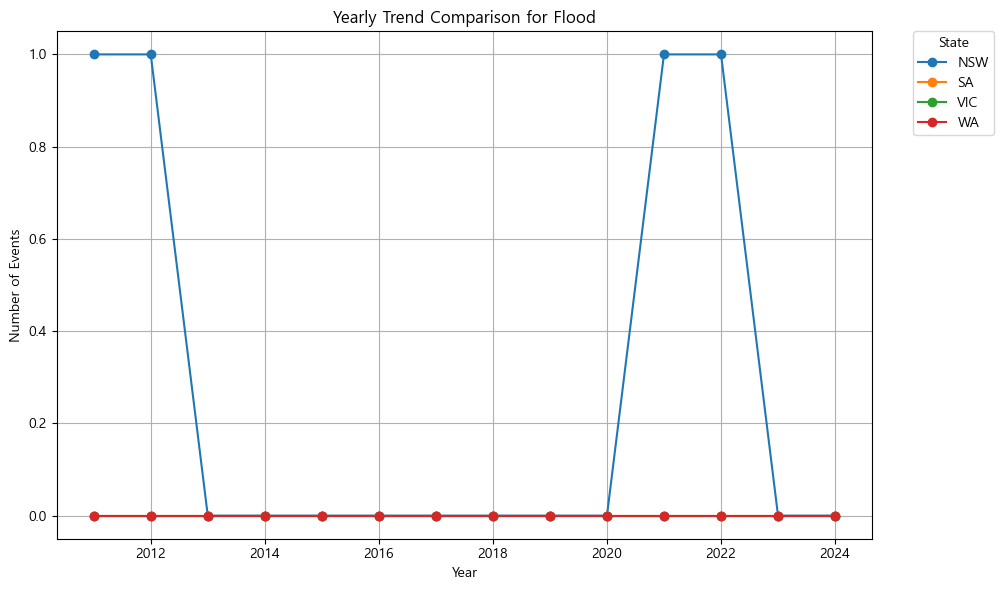

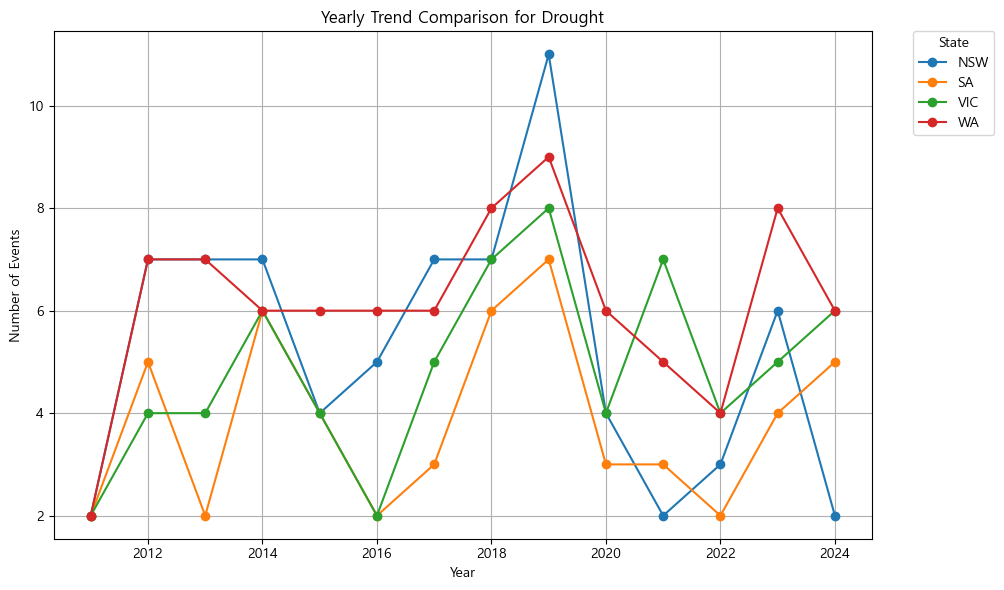

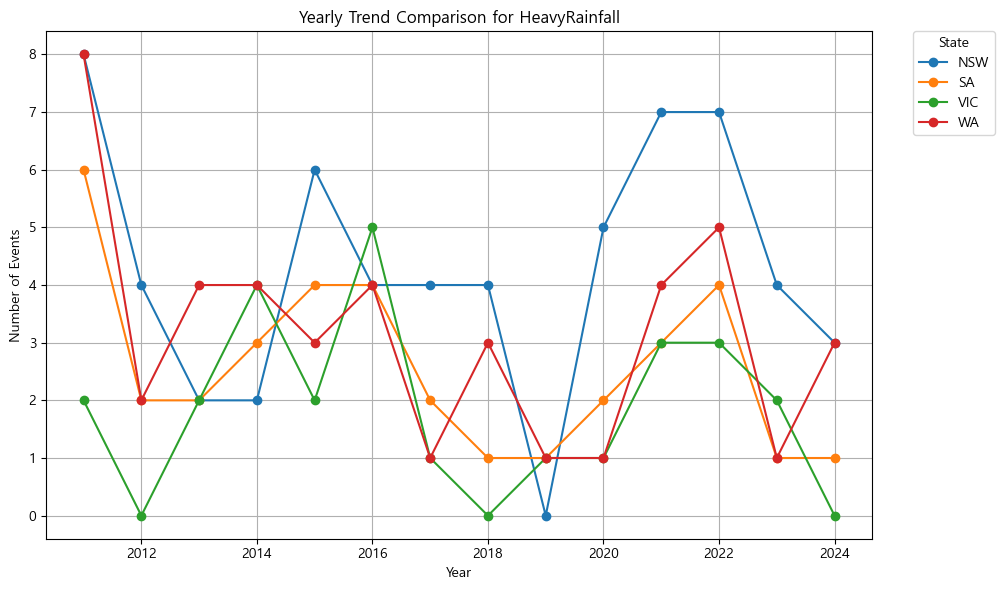

In [54]:
import matplotlib.pyplot as plt

# 연도별 추세를 주별로 비교
for disaster in yearly_trends['NSW'].columns:  # 각 재난 유형(Flood, Heatwave 등)에 대해
    plt.figure(figsize=(12, 6))
    
    for state, trends in yearly_trends.items():
        # 특정 재난 유형(disaster)의 주별 데이터를 그래프로 추가
        plt.plot(trends.index, trends[disaster], marker='o', label=state)
    
    # 그래프 설정
    plt.title(f'Yearly Trend Comparison for {disaster}')
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.grid()
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    # 레이아웃 조정
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # 그래프 오른쪽 여백 확보
    plt.show()


# Wheat_Price Data

In [ ]:
# 2. 밀 가격 데이터
price = pd.read_excel(r'C:\Users\USER\Documents\01_Academic\06_기후빅데이터분석\기후PBL\3_AUS_wheat_price.xlsx')
display(price.head())
price.info()

DATE  구분 품목명      국가명     AGCODE      HSCODE        금액          중량
0  202410  수입   밀  오스트레일리아  111031123  1001190000     24650     10000.0
1  202410  수입   밀  오스트레일리아  111032001  1101001000     31436     24148.0
2  202410  수입   밀  오스트레일리아  111032042  1001991090     90000    200000.0
3  202410  수입   밀  오스트레일리아  111032052  1001992090  29186447  84970080.0
4  202410  수입   밀  오스트레일리아  111032062  1001999090        10         1.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    908 non-null    int64  
 1   구분      908 non-null    object 
 2   품목명     908 non-null    object 
 3   국가명     908 non-null    object 
 4   AGCODE  908 non-null    int64  
 5   HSCODE  908 non-null    int64  
 6   금액      908 non-null    int64  
 7   중량      908 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 56.9+ KB


In [ ]:
# 분석 결과를 저장할 리스트
climate_data_processed = []

# 2. 주별 데이터 로드 및 전처리
for state, file_path in climate_files.items():
    print(f"Processing data for {state}...")
    
    # 데이터 로드
    data = pd.read_csv(file_path)
    
    # 날짜 처리
    data['date'] = pd.to_datetime(data['date'])  # 날짜 열 변환 (열 이름이 'date'라고 가정)
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month

    # 평년 데이터 준비 (년도별 평균)
    data['rainfall_avg'] = data.groupby(['month'])['rainfall'].transform('mean')  # 평년 강수량 계산
    
    # 이상기후 계산 (예: 폭염, 가뭄 등)
    data['heat_wave'] = (data['max_temp'] >= 35).astype(int)  # 폭염 기준: 35℃ 이상
    data['drought'] = (data['rainfall'] < data['rainfall_avg'] * 0.3).astype(int)  # 가뭄 기준: 평년 대비 30% 미만 강수량
    
    # 전년 대비 강수량 차이 계산
    data['rainfall_diff_last_year'] = data.groupby(['month'])['rainfall'].diff(12)
    
    # 평년 대비 강수량 차이
    data['rainfall_diff_avg'] = data['rainfall'] - data['rainfall_avg']
    
    # 이상기후 집계
    summary = data.groupby(['year', 'month']).agg({
        'heat_wave': 'sum',  # 폭염 발생 일수
        'drought': 'sum',  # 가뭄 발생 일수
        'rainfall_diff_avg': 'mean',  # 평년 대비 강수량 차이
        'rainfall_diff_last_year': 'mean'  # 전년 대비 강수량 차이
    }).reset_index()
    
    summary['state'] = state  # 주 정보 추가
    climate_data_processed.append(summary)

# 3. 주별 데이터를 병합
climate_combined = pd.concat(climate_data_processed)

# 4. 밀 가격 데이터와 병합
# 밀 가격 데이터를 월별로 그룹화
price['date'] = pd.to_datetime(price['date'])  # 날짜 변환
price['year'] = price['date'].dt.year
price['month'] = price['date'].dt.month

# 밀 가격 데이터를 월별 평균으로 집계
price_monthly = price.groupby(['year', 'month'])['price'].mean().reset_index()

# 기후 데이터와 밀 가격 데이터 병합
merged_data = pd.merge(climate_combined, price_monthly, on=['year', 'month'], how='inner')

# 5. 분석 및 시각화
# 이상기후와 밀 가격 간 상관관계 확인
correlations = merged_data.corr()
print("Correlation matrix:")
print(correlations)

In [ ]:
# 6. 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 폭염과 밀 가격
sns.scatterplot(x='heat_wave', y='price', data=merged_data)
plt.title('Heat Wave Days vs Wheat Price')
plt.xlabel('Number of Heat Wave Days')
plt.ylabel('Wheat Price')
plt.show()

# 가뭄과 밀 가격
sns.scatterplot(x='drought', y='price', data=merged_data)
plt.title('Drought Days vs Wheat Price')
plt.xlabel('Number of Drought Days')
plt.ylabel('Wheat Price')
plt.show()

In [ ]:
for state, file_path in climate_files.items():
    # Load the file
    data = pd.read_csv(file_path, encoding='utf-8')
    
    # Replace outliers (-99.9) with the previous month's value
    data.replace(-99.9, pd.NA, inplace=True)
    data.fillna(method='ffill', inplace=True)
    
    # Fill remaining null values with 0
    data.fillna(0, inplace=True)
    
    # Switch max and min temperature if max is negative or min is positive
    if MAX_TEMP_NAME in data.columns and MIN_TEMP_NAME in data.columns:
        max_temp = data[MAX_TEMP_NAME]
        min_temp = data[MIN_TEMP_NAME]
        data[MAX_TEMP_NAME] = max_temp.where(max_temp > min_temp, min_temp)
        data[MIN_TEMP_NAME] = min_temp.where(max_temp > min_temp, max_temp)
    
    # Convert time format to yyyy-mm
    if TIME_NAME in data.columns:
        data[TIME_NAME] = pd.to_datetime(data[TIME_NAME]).dt.strftime('%Y-%m')
    
    processed_data[state] = data

C:\Users\seonu\AppData\Local\Temp\ipykernel_17668\2783048957.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\seonu\AppData\Local\Temp\ipykernel_17668\2783048957.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\seonu\AppData\Local\Temp\ipykernel_17668\2783048957.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Display a sample of the processed data for one region
processed_data['USA_North_Dakota'].head()

지점명 시각 (YYYY-MM-DD)  월평균 일최고기온 (°C)  월평균 일최저기온 (°C)  월 총 강수량 (mm)
0  Bismark         2010-01            -5.0           -16.7          10.9
1  Bismark         2010-02            -2.2           -13.3          13.0
2  Bismark         2010-03            -4.8           -16.6          10.9
3  Bismark         2010-04            13.9            -0.6          32.0
4  Bismark         2010-05            20.0             6.1          61.0

In [ ]:
import os

# 저장 경로 설정 (로컬 환경의 원하는 디렉토리로 변경)
output_folder = "C:/kmu/CBA/output/"
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 각 지역 데이터를 CSV로 저장
for region, data in processed_data.items():
    # 파일명 생성 (지역 이름을 포함)
    output_file = os.path.join(output_folder, f"{region}_processed.csv")
    # CSV로 저장
    data.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"Saved processed data for {region} to {output_file}")


Saved processed data for USA_North_Dakota to C:/kmu/CBA/output/USA_North_Dakota_processed.csv
Saved processed data for Canada_Saskatchewan to C:/kmu/CBA/output/Canada_Saskatchewan_processed.csv
Saved processed data for Australia_Geraldton to C:/kmu/CBA/output/Australia_Geraldton_processed.csv


Text(0.5, 1.0, '데이터 취업 스쿨')

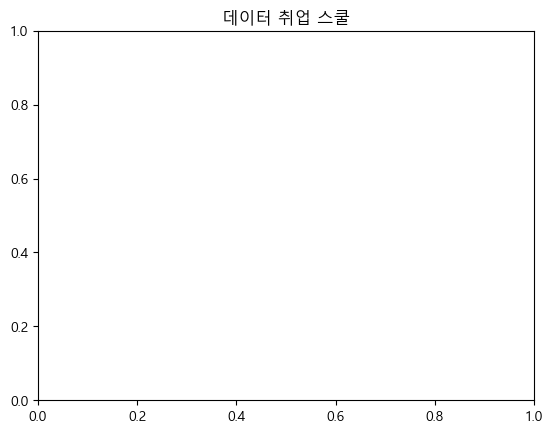

In [ ]:
rc('font', family='Malgun Gothic')	
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline
plt.title('데이터 취업 스쿨')

In [ ]:
# year_month 형식을을 timestamp로 변환
for region, data in processed_data.items():
    data[TIME_NAME] = pd.to_datetime(data[TIME_NAME])
processed_data['USA_North_Dakota'].head()

지점명 시각 (YYYY-MM-DD)  월평균 일최고기온 (°C)  월평균 일최저기온 (°C)  월 총 강수량 (mm)
0  Bismark      2010-01-01            -5.0           -16.7          10.9
1  Bismark      2010-02-01            -2.2           -13.3          13.0
2  Bismark      2010-03-01            -4.8           -16.6          10.9
3  Bismark      2010-04-01            13.9            -0.6          32.0
4  Bismark      2010-05-01            20.0             6.1          61.0

In [ ]:

# 시각화
# 한국 기상청 데이터
# columns_to_plot = [
#     "월평균 기온 (°C)",
#     "월평균 일최고기온 (°C)",
#     "월평균 일최저기온 (°C)",
#     "최대 일강수량 (mm)",
#     "일평균 기온의 월표준편차"
# ]

# 각 나라별 기상청 데이터
columns_to_plot = [
    "월평균 일최고기온 (°C)",
    "월평균 일최저기온 (°C)",
    "월 총 강수량 (mm)"
]

# 지역별 색상 지정
colors = {
    "USA_North_Dakota": "red",
    "Canada_Saskatchewan": "blue",
    "Australia_Geraldton": "green"
}

In [ ]:
# matplotlib로 그래프 그리기

# # 각 컬럼별 그래프 생성
# for column in columns_to_plot:
#     plt.figure(figsize=(10, 6))
#     for region, data in processed_data.items():
#         plt.plot(
#             data[TIME_NAME],
#             data[column],
#             label=data["지점명"].iloc[0],  # 지점명을 범례로 사용
#             color=colors[region]
#         )
    
#     plt.title(f"Time Series of {column}")
#     plt.xlabel("Time (yyyy-mm)")
#     plt.ylabel(column)
#     plt.xticks(rotation=90)
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [ ]:

# 저장 경로 설정 (로컬 환경의 원하는 디렉토리로 변경)
output_folder = "C:/kmu/CBA/plots/"
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# Seaborn으로 그래프 그리기 및 저장
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    for region, data in processed_data.items():
        sns.lineplot(
            data=data,
            x=TIME_NAME,
            y=column,
            label=data["지점명"].iloc[0],  # 지점명을 범례로 사용
            color=colors[region],
            marker="."
        )
    plt.title(f"Time Series of {column}")
    plt.xlabel("시각 (MM-YY)")
    plt.ylabel(column)
    plt.xticks(rotation=0)
    plt.legend()
    # plt.grid(True)
    plt.tight_layout()
    
    # 파일 경로 설정 및 저장
    output_file = os.path.join(output_folder, f"{column.replace(' ', '_').replace('(', '').replace(')', '')}.png")
    plt.savefig(output_file, dpi=300)
    print(f"Saved plot for {column} to {output_file}")
    plt.close()  # 그래프 닫기


Saved plot for 월평균 일최고기온 (°C) to C:/kmu/CBA/plots/월평균_일최고기온_°C.png
Saved plot for 월평균 일최저기온 (°C) to C:/kmu/CBA/plots/월평균_일최저기온_°C.png
Saved plot for 월 총 강수량 (mm) to C:/kmu/CBA/plots/월_총_강수량_mm.png
